# Final Experiment (Binary Classification)

In [70]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, precision_recall_curve, PrecisionRecallDisplay
from tensorflow.keras.models import load_model
from pathlib import Path

import sys
module_path = os.path.abspath(os.getcwd() + '\\..')
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.load_dataset import load_dataset, load_fusioned_dataset
from src.lib.time_series_augmentation.utils.augmentation import jitter, rotation
from src.models.CNNLSTM import CNNLSTM
from src.models.RCNN import RCNN
from src.lib.DeepStack.deepstack.base import KerasMember
from src.lib.DeepStack.deepstack.ensemble import DirichletEnsemble

In [2]:
kf = KFold(n_splits=10, shuffle=True, random_state=48)
epochs = 100
cnn_auc = []
rnn_auc = []

In [3]:
model_path = Path(os.path.abspath('')).parent / 'models' / 'saved'

## 1. Unimodal Body (Skeleton Pose Estimation)

In [4]:
X_train, X_test, y_train, y_test = load_dataset('skeleton', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(783, 1, 350, 35) (783, 1)
(274, 1, 350, 35) (274, 1)


### 1.1 CNN + BiLSTM

Epoch 1/100
22/22 - 8s - loss: 0.7436 - accuracy: 0.5838 - auc: 0.5979 - precision: 0.5797 - recall: 0.5029 - f1_score: 0.6513 - val_loss: 0.6754 - val_accuracy: 0.5949 - val_auc: 0.6587 - val_precision: 0.7000 - val_recall: 0.3500 - val_f1_score: 0.6723 - 8s/epoch - 384ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6330 - accuracy: 0.6591 - auc: 0.6983 - precision: 0.6603 - recall: 0.6059 - f1_score: 0.6513 - val_loss: 0.6746 - val_accuracy: 0.5570 - val_auc: 0.6087 - val_precision: 0.5455 - val_recall: 0.7500 - val_f1_score: 0.6723 - 1s/epoch - 55ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6272 - accuracy: 0.6577 - auc: 0.7071 - precision: 0.6523 - recall: 0.6235 - f1_score: 0.6513 - val_loss: 0.6749 - val_accuracy: 0.5823 - val_auc: 0.6647 - val_precision: 0.5636 - val_recall: 0.7750 - val_f1_score: 0.6723 - 977ms/epoch - 44ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5760 - accuracy: 0.6989 - auc: 0.7691 - precision: 0.6850 - recall: 0.6971 - f1_score: 0.6513 - val_loss: 0.6564 - val_accuracy: 

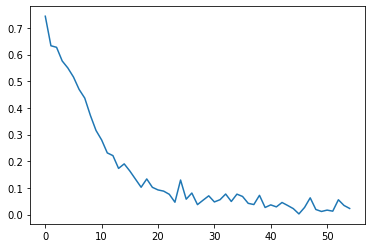

Epoch 1/100
22/22 - 5s - loss: 0.7421 - accuracy: 0.5625 - auc_1: 0.5946 - precision_1: 0.5471 - recall_1: 0.5471 - f1_score: 0.6513 - val_loss: 0.6706 - val_accuracy: 0.6203 - val_auc_1: 0.6728 - val_precision_1: 0.6562 - val_recall_1: 0.5250 - val_f1_score: 0.6723 - 5s/epoch - 212ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6409 - accuracy: 0.6335 - auc_1: 0.6831 - precision_1: 0.6250 - recall_1: 0.6029 - f1_score: 0.6513 - val_loss: 0.6652 - val_accuracy: 0.5949 - val_auc_1: 0.6917 - val_precision_1: 0.6818 - val_recall_1: 0.3750 - val_f1_score: 0.6723 - 1s/epoch - 54ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6051 - accuracy: 0.6733 - auc_1: 0.7340 - precision_1: 0.6741 - recall_1: 0.6265 - f1_score: 0.6513 - val_loss: 0.6323 - val_accuracy: 0.6835 - val_auc_1: 0.7298 - val_precision_1: 0.6667 - val_recall_1: 0.7500 - val_f1_score: 0.6723 - 1s/epoch - 54ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5871 - accuracy: 0.6960 - auc_1: 0.7549 - precision_1: 0.7019 - recall_1: 0.6441 - f1_score: 0.6

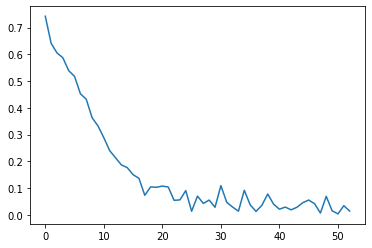

Epoch 1/100
22/22 - 5s - loss: 0.7470 - accuracy: 0.5540 - auc_2: 0.5625 - precision_2: 0.5310 - recall_2: 0.4639 - f1_score: 0.6409 - val_loss: 0.6819 - val_accuracy: 0.5696 - val_auc_2: 0.6838 - val_precision_2: 0.7692 - val_recall_2: 0.4167 - val_f1_score: 0.7559 - 5s/epoch - 209ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6494 - accuracy: 0.6449 - auc_2: 0.6669 - precision_2: 0.6314 - recall_2: 0.5934 - f1_score: 0.6409 - val_loss: 0.6890 - val_accuracy: 0.5696 - val_auc_2: 0.7332 - val_precision_2: 0.8182 - val_recall_2: 0.3750 - val_f1_score: 0.7559 - 961ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6110 - accuracy: 0.6747 - auc_2: 0.7233 - precision_2: 0.6782 - recall_2: 0.5904 - f1_score: 0.6409 - val_loss: 0.6610 - val_accuracy: 0.6076 - val_auc_2: 0.6882 - val_precision_2: 0.7429 - val_recall_2: 0.5417 - val_f1_score: 0.7559 - 1s/epoch - 56ms/step
Epoch 4/100
22/22 - 1s - loss: 0.6027 - accuracy: 0.6548 - auc_2: 0.7305 - precision_2: 0.6529 - recall_2: 0.5723 - f1_score: 

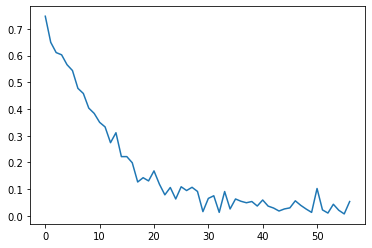

Epoch 1/100
23/23 - 5s - loss: 0.7294 - accuracy: 0.5574 - auc_3: 0.5751 - precision_3: 0.5503 - recall_3: 0.5087 - f1_score: 0.6559 - val_loss: 0.8986 - val_accuracy: 0.5385 - val_auc_3: 0.6571 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - val_f1_score: 0.6316 - 5s/epoch - 226ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6539 - accuracy: 0.6411 - auc_3: 0.6695 - precision_3: 0.6472 - recall_3: 0.5814 - f1_score: 0.6559 - val_loss: 0.7609 - val_accuracy: 0.5513 - val_auc_3: 0.6118 - val_precision_3: 1.0000 - val_recall_3: 0.0278 - val_f1_score: 0.6316 - 1s/epoch - 52ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6389 - accuracy: 0.6610 - auc_3: 0.6996 - precision_3: 0.6699 - recall_3: 0.6017 - f1_score: 0.6559 - val_loss: 0.8939 - val_accuracy: 0.5513 - val_auc_3: 0.6577 - val_precision_3: 1.0000 - val_recall_3: 0.0278 - val_f1_score: 0.6316 - 998ms/epoch - 43ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5869 - accuracy: 0.6851 - auc_3: 0.7556 - precision_3: 0.6871 - recall_3: 0.6512 - f1

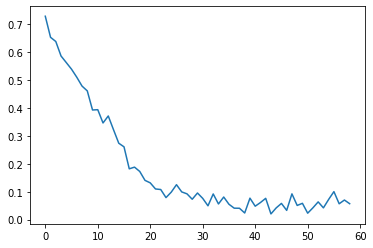

Epoch 1/100
23/23 - 5s - loss: 0.7004 - accuracy: 0.5787 - auc_4: 0.6086 - precision_4: 0.5831 - recall_4: 0.5314 - f1_score: 0.6635 - val_loss: 0.6594 - val_accuracy: 0.6154 - val_auc_4: 0.6420 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_f1_score: 0.5556 - 5s/epoch - 224ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6328 - accuracy: 0.6369 - auc_4: 0.6938 - precision_4: 0.6497 - recall_4: 0.5829 - f1_score: 0.6635 - val_loss: 0.6559 - val_accuracy: 0.6154 - val_auc_4: 0.6045 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00 - val_f1_score: 0.5556 - 1s/epoch - 55ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6102 - accuracy: 0.6652 - auc_4: 0.7311 - precision_4: 0.6748 - recall_4: 0.6286 - f1_score: 0.6635 - val_loss: 0.7634 - val_accuracy: 0.4872 - val_auc_4: 0.6132 - val_precision_4: 0.4286 - val_recall_4: 1.0000 - val_f1_score: 0.5556 - 945ms/epoch - 41ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5779 - accuracy: 0.7050 - auc_4: 0.7670 - precision_4: 0.6940 - recall_4: 0.7

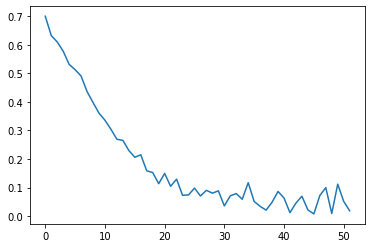

Epoch 1/100
23/23 - 5s - loss: 0.7323 - accuracy: 0.5546 - auc_5: 0.5864 - precision_5: 0.5442 - recall_5: 0.5694 - f1_score: 0.6584 - val_loss: 0.7363 - val_accuracy: 0.5641 - val_auc_5: 0.6791 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - val_f1_score: 0.6071 - 5s/epoch - 224ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6304 - accuracy: 0.6553 - auc_5: 0.7019 - precision_5: 0.6700 - recall_5: 0.5867 - f1_score: 0.6584 - val_loss: 0.6521 - val_accuracy: 0.6795 - val_auc_5: 0.6457 - val_precision_5: 0.6552 - val_recall_5: 0.5588 - val_f1_score: 0.6071 - 1s/epoch - 52ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6086 - accuracy: 0.6879 - auc_5: 0.7335 - precision_5: 0.6909 - recall_5: 0.6590 - f1_score: 0.6584 - val_loss: 0.7466 - val_accuracy: 0.5385 - val_auc_5: 0.6905 - val_precision_5: 0.4857 - val_recall_5: 1.0000 - val_f1_score: 0.6071 - 974ms/epoch - 42ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5711 - accuracy: 0.7021 - auc_5: 0.7700 - precision_5: 0.6977 - recall_5: 0.6936 - f1

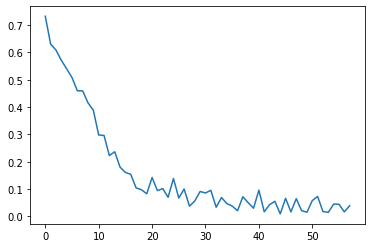

Epoch 1/100
23/23 - 5s - loss: 0.7986 - accuracy: 0.5730 - auc_6: 0.5692 - precision_6: 0.5621 - recall_6: 0.5539 - f1_score: 0.6546 - val_loss: 0.8133 - val_accuracy: 0.5256 - val_auc_6: 0.7076 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.6435 - 5s/epoch - 217ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6315 - accuracy: 0.6539 - auc_6: 0.7012 - precision_6: 0.6701 - recall_6: 0.5685 - f1_score: 0.6546 - val_loss: 0.7642 - val_accuracy: 0.4744 - val_auc_6: 0.7175 - val_precision_6: 0.4744 - val_recall_6: 1.0000 - val_f1_score: 0.6435 - 1s/epoch - 52ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6164 - accuracy: 0.6723 - auc_6: 0.7237 - precision_6: 0.6609 - recall_6: 0.6706 - f1_score: 0.6546 - val_loss: 0.9587 - val_accuracy: 0.5256 - val_auc_6: 0.6421 - val_precision_6: 0.0000e+00 - val_recall_6: 0.0000e+00 - val_f1_score: 0.6435 - 983ms/epoch - 43ms/step
Epoch 4/100
23/23 - 1s - loss: 0.6099 - accuracy: 0.6709 - auc_6: 0.7284 - precision_6: 0.6989 - recall_6: 0.5

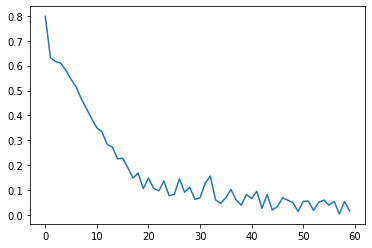

Epoch 1/100
23/23 - 5s - loss: 0.7684 - accuracy: 0.5518 - auc_7: 0.5561 - precision_7: 0.5399 - recall_7: 0.4408 - f1_score: 0.6481 - val_loss: 0.7581 - val_accuracy: 0.5385 - val_auc_7: 0.6832 - val_precision_7: 0.5385 - val_recall_7: 1.0000 - val_f1_score: 0.7000 - 5s/epoch - 228ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6535 - accuracy: 0.6340 - auc_7: 0.6698 - precision_7: 0.6190 - recall_7: 0.6154 - f1_score: 0.6481 - val_loss: 0.7407 - val_accuracy: 0.5385 - val_auc_7: 0.6481 - val_precision_7: 0.5385 - val_recall_7: 1.0000 - val_f1_score: 0.7000 - 1s/epoch - 51ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6254 - accuracy: 0.6610 - auc_7: 0.7080 - precision_7: 0.6418 - recall_7: 0.6627 - f1_score: 0.6481 - val_loss: 0.7461 - val_accuracy: 0.5897 - val_auc_7: 0.6154 - val_precision_7: 0.5714 - val_recall_7: 0.9524 - val_f1_score: 0.7000 - 964ms/epoch - 42ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5985 - accuracy: 0.6965 - auc_7: 0.7432 - precision_7: 0.6782 - recall_7: 0.6982 - f1_score: 

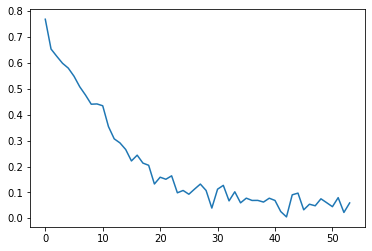

Epoch 1/100
23/23 - 5s - loss: 0.7750 - accuracy: 0.5518 - auc_8: 0.5483 - precision_8: 0.5328 - recall_8: 0.5516 - f1_score: 0.6494 - val_loss: 0.9587 - val_accuracy: 0.4744 - val_auc_8: 0.6447 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1_score: 0.6891 - 5s/epoch - 225ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6511 - accuracy: 0.6213 - auc_8: 0.6693 - precision_8: 0.6259 - recall_8: 0.5280 - f1_score: 0.6494 - val_loss: 1.0251 - val_accuracy: 0.4744 - val_auc_8: 0.6338 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1_score: 0.6891 - 974ms/epoch - 42ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6441 - accuracy: 0.6426 - auc_8: 0.6834 - precision_8: 0.6733 - recall_8: 0.4985 - f1_score: 0.6494 - val_loss: 0.7754 - val_accuracy: 0.4615 - val_auc_8: 0.7370 - val_precision_8: 0.0000e+00 - val_recall_8: 0.0000e+00 - val_f1_score: 0.6891 - 1s/epoch - 53ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5974 - accuracy: 0.6879 - auc_8: 0.7385 - precision_8: 0.6990 - recal

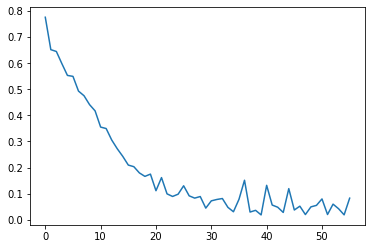

Epoch 1/100
23/23 - 5s - loss: 0.8146 - accuracy: 0.5716 - auc_9: 0.5771 - precision_9: 0.5676 - recall_9: 0.5546 - f1_score: 0.6610 - val_loss: 0.8860 - val_accuracy: 0.5897 - val_auc_9: 0.6308 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_f1_score: 0.5818 - 5s/epoch - 227ms/step
Epoch 2/100
23/23 - 1s - loss: 0.6606 - accuracy: 0.6227 - auc_9: 0.6598 - precision_9: 0.6464 - recall_9: 0.5201 - f1_score: 0.6610 - val_loss: 0.8281 - val_accuracy: 0.5897 - val_auc_9: 0.7171 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00 - val_f1_score: 0.5818 - 1s/epoch - 54ms/step
Epoch 3/100
23/23 - 1s - loss: 0.6401 - accuracy: 0.6298 - auc_9: 0.6891 - precision_9: 0.6455 - recall_9: 0.5546 - f1_score: 0.6610 - val_loss: 0.7130 - val_accuracy: 0.6538 - val_auc_9: 0.6661 - val_precision_9: 0.8571 - val_recall_9: 0.1875 - val_f1_score: 0.5818 - 1s/epoch - 53ms/step
Epoch 4/100
23/23 - 1s - loss: 0.5896 - accuracy: 0.6865 - auc_9: 0.7568 - precision_9: 0.6978 - recall_9: 0.6437

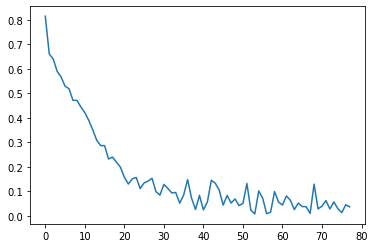

In [5]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_body_model = CNNLSTM(n_features, None, n_length, n_outputs, multiclass=True)
    history = cnnlstm_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_body_model.save(model_path / 'body_binary_cnnlstm.h5')

#### Training performance

In [6]:
body_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
body_cnnlstm_train_results

{'Accuracy': 0.9862375080585479,
 'ROC/AUC': 0.9981939375400544,
 'Precision': 0.9859366655349732,
 'Recall': 0.9856328308582306,
 'F1-score': 0.653450357913971}

#### Validation performance

In [7]:
body_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
body_cnnlstm_val_results

{'Accuracy': 0.6806718647480011,
 'ROC/AUC': 0.7384858727455139,
 'Precision': 0.6708087682723999,
 'Recall': 0.6745423138141632,
 'F1-score': 0.6509092807769775}

#### Predictions and performance on test set

In [8]:
cnnlstm_binary_body_model = load_model(model_path / 'body_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_body_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 1.9660 - accuracy: 0.4416 - auc_9: 0.5538 - precision_9: 0.9020 - recall_9: 0.3915 - f1_score: 0.9234
Accuracy: 44.16% 
ROC/AUC: 0.55 
Precision: 0.90 
Recall: 0.39 
F1 score: 0.92


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

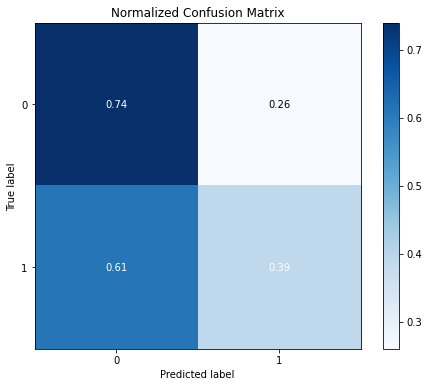

In [10]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

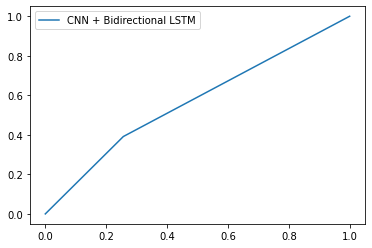

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

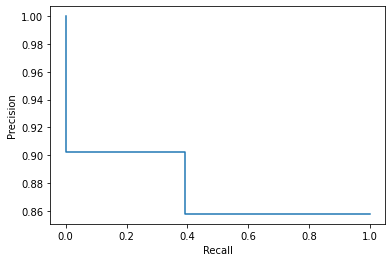

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 1.2 RCNN

Epoch 1/100
29/29 - 2s - loss: 0.7851 - accuracy: 0.5767 - auc_10: 0.6035 - precision_10: 0.5652 - recall_10: 0.5353 - f1_score: 0.6513 - val_loss: 0.8819 - val_accuracy: 0.5949 - val_auc_10: 0.6657 - val_precision_10: 0.5741 - val_recall_10: 0.7750 - val_f1_score: 0.6723 - 2s/epoch - 72ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6845 - accuracy: 0.6250 - auc_10: 0.6521 - precision_10: 0.6180 - recall_10: 0.5853 - f1_score: 0.6513 - val_loss: 0.7551 - val_accuracy: 0.5190 - val_auc_10: 0.7151 - val_precision_10: 0.5139 - val_recall_10: 0.9250 - val_f1_score: 0.6723 - 448ms/epoch - 15ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6227 - accuracy: 0.6477 - auc_10: 0.7133 - precision_10: 0.6394 - recall_10: 0.6206 - f1_score: 0.6513 - val_loss: 2.5760 - val_accuracy: 0.5063 - val_auc_10: 0.6833 - val_precision_10: 0.5063 - val_recall_10: 1.0000 - val_f1_score: 0.6723 - 395ms/epoch - 14ms/step
Epoch 4/100
29/29 - 0s - loss: 0.6033 - accuracy: 0.6861 - auc_10: 0.7406 - precision_10: 0.6766 - recall_

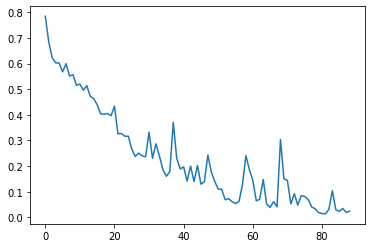

Epoch 1/100
29/29 - 2s - loss: 0.8518 - accuracy: 0.5838 - auc_11: 0.6111 - precision_11: 0.5714 - recall_11: 0.5529 - f1_score: 0.6513 - val_loss: 7.0757 - val_accuracy: 0.5063 - val_auc_11: 0.5000 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 2s/epoch - 64ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6446 - accuracy: 0.6562 - auc_11: 0.6974 - precision_11: 0.6392 - recall_11: 0.6618 - f1_score: 0.6513 - val_loss: 2.8815 - val_accuracy: 0.5063 - val_auc_11: 0.5801 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 413ms/epoch - 14ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6167 - accuracy: 0.6634 - auc_11: 0.7244 - precision_11: 0.6635 - recall_11: 0.6147 - f1_score: 0.6513 - val_loss: 2.3474 - val_accuracy: 0.5063 - val_auc_11: 0.6147 - val_precision_11: 0.5063 - val_recall_11: 1.0000 - val_f1_score: 0.6723 - 437ms/epoch - 15ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5939 - accuracy: 0.7060 - auc_11: 0.7536 - precision_11: 0.6962 - recall_

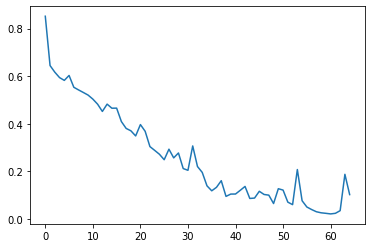

Epoch 1/100
29/29 - 2s - loss: 0.8148 - accuracy: 0.6023 - auc_12: 0.6210 - precision_12: 0.5897 - recall_12: 0.5151 - f1_score: 0.6409 - val_loss: 4.7544 - val_accuracy: 0.6076 - val_auc_12: 0.5000 - val_precision_12: 0.6076 - val_recall_12: 1.0000 - val_f1_score: 0.7559 - 2s/epoch - 63ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6238 - accuracy: 0.6577 - auc_12: 0.7182 - precision_12: 0.6596 - recall_12: 0.5663 - f1_score: 0.6409 - val_loss: 1.8329 - val_accuracy: 0.6076 - val_auc_12: 0.7564 - val_precision_12: 0.6076 - val_recall_12: 1.0000 - val_f1_score: 0.7559 - 421ms/epoch - 15ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6333 - accuracy: 0.6577 - auc_12: 0.7033 - precision_12: 0.6444 - recall_12: 0.6114 - f1_score: 0.6409 - val_loss: 1.1944 - val_accuracy: 0.5949 - val_auc_12: 0.7661 - val_precision_12: 0.6026 - val_recall_12: 0.9792 - val_f1_score: 0.7559 - 426ms/epoch - 15ms/step
Epoch 4/100
29/29 - 0s - loss: 0.6074 - accuracy: 0.6747 - auc_12: 0.7480 - precision_12: 0.6689 - recall_

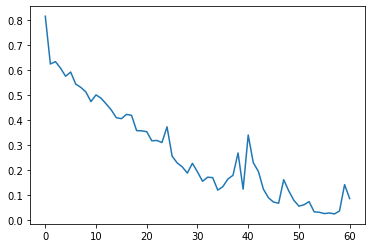

Epoch 1/100
29/29 - 2s - loss: 0.8580 - accuracy: 0.5702 - auc_13: 0.5873 - precision_13: 0.5655 - recall_13: 0.5145 - f1_score: 0.6559 - val_loss: 6.5018 - val_accuracy: 0.4615 - val_auc_13: 0.5000 - val_precision_13: 0.4615 - val_recall_13: 1.0000 - val_f1_score: 0.6316 - 2s/epoch - 64ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6390 - accuracy: 0.6369 - auc_13: 0.6971 - precision_13: 0.6429 - recall_13: 0.5756 - f1_score: 0.6559 - val_loss: 3.0030 - val_accuracy: 0.4615 - val_auc_13: 0.6247 - val_precision_13: 0.4615 - val_recall_13: 1.0000 - val_f1_score: 0.6316 - 409ms/epoch - 14ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6027 - accuracy: 0.6511 - auc_13: 0.7364 - precision_13: 0.6591 - recall_13: 0.5901 - f1_score: 0.6559 - val_loss: 1.0482 - val_accuracy: 0.5128 - val_auc_13: 0.5860 - val_precision_13: 0.4857 - val_recall_13: 0.9444 - val_f1_score: 0.6316 - 440ms/epoch - 15ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5789 - accuracy: 0.7021 - auc_13: 0.7634 - precision_13: 0.7094 - recall_

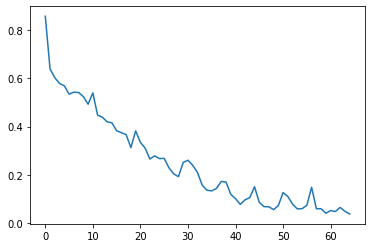

Epoch 1/100
29/29 - 2s - loss: 0.8040 - accuracy: 0.5957 - auc_14: 0.6149 - precision_14: 0.5926 - recall_14: 0.5943 - f1_score: 0.6635 - val_loss: 0.9163 - val_accuracy: 0.5769 - val_auc_14: 0.6694 - val_precision_14: 0.4737 - val_recall_14: 0.9000 - val_f1_score: 0.5556 - 2s/epoch - 71ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6315 - accuracy: 0.6596 - auc_14: 0.7092 - precision_14: 0.6599 - recall_14: 0.6486 - f1_score: 0.6635 - val_loss: 5.6792 - val_accuracy: 0.3846 - val_auc_14: 0.4937 - val_precision_14: 0.3846 - val_recall_14: 1.0000 - val_f1_score: 0.5556 - 400ms/epoch - 14ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6375 - accuracy: 0.6511 - auc_14: 0.7120 - precision_14: 0.6477 - recall_14: 0.6514 - f1_score: 0.6635 - val_loss: 0.9817 - val_accuracy: 0.5000 - val_auc_14: 0.6556 - val_precision_14: 0.4237 - val_recall_14: 0.8333 - val_f1_score: 0.5556 - 430ms/epoch - 15ms/step
Epoch 4/100
29/29 - 0s - loss: 0.6006 - accuracy: 0.7021 - auc_14: 0.7547 - precision_14: 0.7147 - recall_

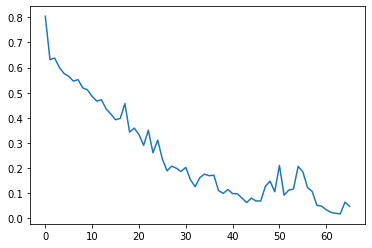

Epoch 1/100
29/29 - 2s - loss: 0.8555 - accuracy: 0.5674 - auc_15: 0.5913 - precision_15: 0.5594 - recall_15: 0.5578 - f1_score: 0.6584 - val_loss: 0.7806 - val_accuracy: 0.6282 - val_auc_15: 0.6380 - val_precision_15: 0.6000 - val_recall_15: 0.4412 - val_f1_score: 0.6071 - 2s/epoch - 63ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6354 - accuracy: 0.6596 - auc_15: 0.7024 - precision_15: 0.6656 - recall_15: 0.6156 - f1_score: 0.6584 - val_loss: 2.8786 - val_accuracy: 0.4359 - val_auc_15: 0.6664 - val_precision_15: 0.4359 - val_recall_15: 1.0000 - val_f1_score: 0.6071 - 381ms/epoch - 13ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6040 - accuracy: 0.6851 - auc_15: 0.7424 - precision_15: 0.7026 - recall_15: 0.6214 - f1_score: 0.6584 - val_loss: 1.1546 - val_accuracy: 0.4872 - val_auc_15: 0.6374 - val_precision_15: 0.4595 - val_recall_15: 1.0000 - val_f1_score: 0.6071 - 405ms/epoch - 14ms/step
Epoch 4/100
29/29 - 0s - loss: 0.6100 - accuracy: 0.6780 - auc_15: 0.7343 - precision_15: 0.6755 - recall_

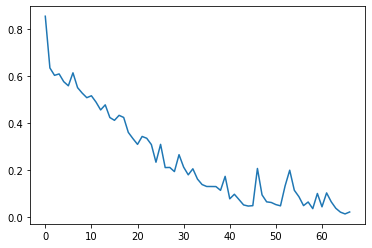

Epoch 1/100
29/29 - 2s - loss: 0.8612 - accuracy: 0.5645 - auc_16: 0.5877 - precision_16: 0.5523 - recall_16: 0.5539 - f1_score: 0.6546 - val_loss: 2.4589 - val_accuracy: 0.4744 - val_auc_16: 0.7551 - val_precision_16: 0.4744 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 2s/epoch - 63ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6410 - accuracy: 0.6553 - auc_16: 0.7000 - precision_16: 0.6524 - recall_16: 0.6239 - f1_score: 0.6546 - val_loss: 1.8530 - val_accuracy: 0.4872 - val_auc_16: 0.7053 - val_precision_16: 0.4805 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 410ms/epoch - 14ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6179 - accuracy: 0.6440 - auc_16: 0.7243 - precision_16: 0.6411 - recall_16: 0.6093 - f1_score: 0.6546 - val_loss: 1.7005 - val_accuracy: 0.4872 - val_auc_16: 0.7123 - val_precision_16: 0.4805 - val_recall_16: 1.0000 - val_f1_score: 0.6435 - 406ms/epoch - 14ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5949 - accuracy: 0.7021 - auc_16: 0.7545 - precision_16: 0.7138 - recall_

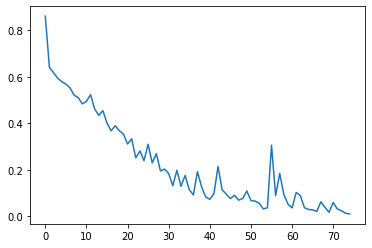

Epoch 1/100
29/29 - 2s - loss: 0.7421 - accuracy: 0.6000 - auc_17: 0.6339 - precision_17: 0.5909 - recall_17: 0.5385 - f1_score: 0.6481 - val_loss: 2.1956 - val_accuracy: 0.5385 - val_auc_17: 0.5364 - val_precision_17: 0.5385 - val_recall_17: 1.0000 - val_f1_score: 0.7000 - 2s/epoch - 63ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6271 - accuracy: 0.6468 - auc_17: 0.7153 - precision_17: 0.6478 - recall_17: 0.5769 - f1_score: 0.6481 - val_loss: 1.1513 - val_accuracy: 0.5128 - val_auc_17: 0.6273 - val_precision_17: 0.5278 - val_recall_17: 0.9048 - val_f1_score: 0.7000 - 369ms/epoch - 13ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6290 - accuracy: 0.6596 - auc_17: 0.7193 - precision_17: 0.6601 - recall_17: 0.5976 - f1_score: 0.6481 - val_loss: 1.7552 - val_accuracy: 0.5385 - val_auc_17: 0.6207 - val_precision_17: 0.5385 - val_recall_17: 1.0000 - val_f1_score: 0.7000 - 350ms/epoch - 12ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5893 - accuracy: 0.6950 - auc_17: 0.7524 - precision_17: 0.6916 - recall_

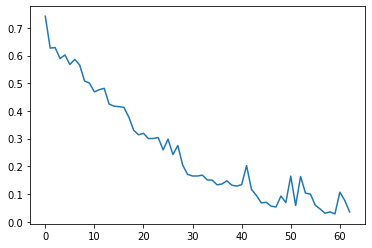

Epoch 1/100
29/29 - 2s - loss: 0.7600 - accuracy: 0.6028 - auc_18: 0.6395 - precision_18: 0.5891 - recall_18: 0.5752 - f1_score: 0.6494 - val_loss: 3.7969 - val_accuracy: 0.5256 - val_auc_18: 0.5171 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 2s/epoch - 73ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6243 - accuracy: 0.6638 - auc_18: 0.7180 - precision_18: 0.6500 - recall_18: 0.6519 - f1_score: 0.6494 - val_loss: 1.9321 - val_accuracy: 0.5256 - val_auc_18: 0.6658 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 351ms/epoch - 12ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6209 - accuracy: 0.6752 - auc_18: 0.7367 - precision_18: 0.6637 - recall_18: 0.6578 - f1_score: 0.6494 - val_loss: 2.8689 - val_accuracy: 0.5256 - val_auc_18: 0.4990 - val_precision_18: 0.5256 - val_recall_18: 1.0000 - val_f1_score: 0.6891 - 406ms/epoch - 14ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5660 - accuracy: 0.7050 - auc_18: 0.7771 - precision_18: 0.6991 - recall_

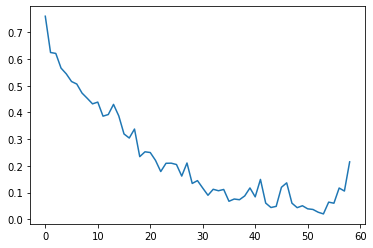

Epoch 1/100
29/29 - 2s - loss: 0.8108 - accuracy: 0.5745 - auc_19: 0.6066 - precision_19: 0.5706 - recall_19: 0.5575 - f1_score: 0.6610 - val_loss: 5.6815 - val_accuracy: 0.4103 - val_auc_19: 0.5000 - val_precision_19: 0.4103 - val_recall_19: 1.0000 - val_f1_score: 0.5818 - 2s/epoch - 62ms/step
Epoch 2/100
29/29 - 0s - loss: 0.6607 - accuracy: 0.6355 - auc_19: 0.6758 - precision_19: 0.6409 - recall_19: 0.5948 - f1_score: 0.6610 - val_loss: 2.2211 - val_accuracy: 0.4103 - val_auc_19: 0.6627 - val_precision_19: 0.4103 - val_recall_19: 1.0000 - val_f1_score: 0.5818 - 436ms/epoch - 15ms/step
Epoch 3/100
29/29 - 0s - loss: 0.6163 - accuracy: 0.6766 - auc_19: 0.7254 - precision_19: 0.6829 - recall_19: 0.6437 - f1_score: 0.6610 - val_loss: 1.2068 - val_accuracy: 0.4487 - val_auc_19: 0.6817 - val_precision_19: 0.4225 - val_recall_19: 0.9375 - val_f1_score: 0.5818 - 390ms/epoch - 13ms/step
Epoch 4/100
29/29 - 0s - loss: 0.5944 - accuracy: 0.6879 - auc_19: 0.7523 - precision_19: 0.6939 - recall_

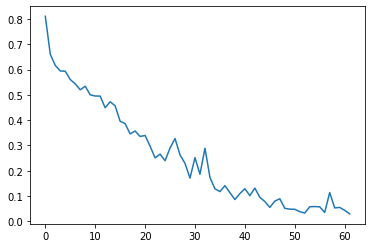

In [13]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_body_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_body_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=25)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_body_model.save(model_path / 'body_binary_rcnn.h5')

#### Training performance

In [14]:
body_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
body_rcnn_train_results

{'Accuracy': 0.9809820413589477,
 'ROC/AUC': 0.9963359832763672,
 'Precision': 0.9788096487522125,
 'Recall': 0.9817172288894653,
 'F1-score': 0.653450357913971}

#### Validation performance

In [15]:
body_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
body_rcnn_val_results

{'Accuracy': 0.6730120122432709,
 'ROC/AUC': 0.7445080280303955,
 'Precision': 0.6704833090305329,
 'Recall': 0.6575678318738938,
 'F1-score': 0.6509092807769775}

#### Predictions and performance on test set

In [16]:
rcnn_binary_body_model = load_model(model_path / 'body_binary_rcnn.h5')
y_pred = rcnn_binary_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_body_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 9ms/step - loss: 0.8923 - accuracy: 0.5657 - auc_16: 0.6557 - precision_16: 0.9085 - recall_16: 0.5489 - f1_score: 0.9234
Accuracy: 56.57% 
ROC/AUC: 0.66 
Precision: 0.91 
Recall: 0.55 
F1 score: 0.92


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

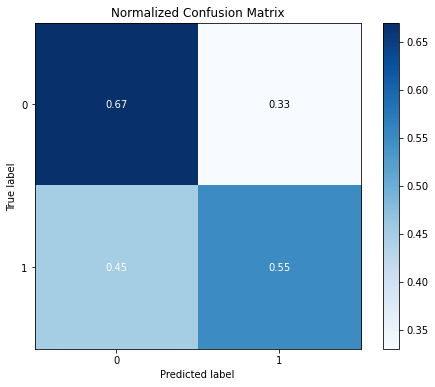

In [18]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

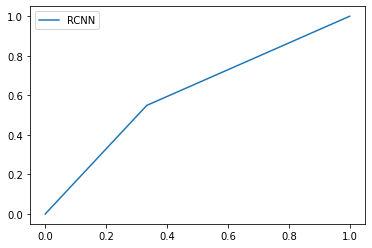

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

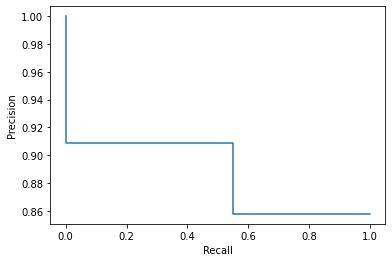

In [20]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 2. Unimodal Face (Facial Expression + Head Pose)

In [21]:
X_train, X_test, y_train, y_test = load_dataset('AUs', binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 25) (752, 1)
(268, 1, 350, 25) (268, 1)


### 2.1 CNN + BiLSTM

Epoch 1/100
22/22 - 5s - loss: 0.7286 - accuracy: 0.5828 - auc_20: 0.6208 - precision_20: 0.5776 - recall_20: 0.4923 - f1_score: 0.6494 - val_loss: 0.6604 - val_accuracy: 0.6447 - val_auc_20: 0.6878 - val_precision_20: 0.6207 - val_recall_20: 0.8780 - val_f1_score: 0.7009 - 5s/epoch - 248ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6498 - accuracy: 0.6450 - auc_20: 0.6718 - precision_20: 0.6412 - recall_20: 0.5938 - f1_score: 0.6494 - val_loss: 0.7444 - val_accuracy: 0.5395 - val_auc_20: 0.6652 - val_precision_20: 0.5395 - val_recall_20: 1.0000 - val_f1_score: 0.7009 - 960ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6186 - accuracy: 0.6672 - auc_20: 0.7163 - precision_20: 0.6524 - recall_20: 0.6585 - f1_score: 0.6494 - val_loss: 0.6812 - val_accuracy: 0.6447 - val_auc_20: 0.6551 - val_precision_20: 0.6842 - val_recall_20: 0.6341 - val_f1_score: 0.7009 - 996ms/epoch - 45ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5927 - accuracy: 0.7027 - auc_20: 0.7484 - precision_20: 0.7095 - recall

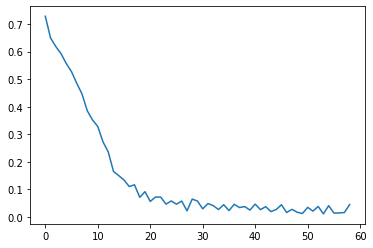

Epoch 1/100
22/22 - 5s - loss: 0.7687 - accuracy: 0.5533 - auc_21: 0.5809 - precision_21: 0.5306 - recall_21: 0.5635 - f1_score: 0.6466 - val_loss: 0.7196 - val_accuracy: 0.4342 - val_auc_21: 0.7347 - val_precision_21: 0.0000e+00 - val_recall_21: 0.0000e+00 - val_f1_score: 0.7227 - 5s/epoch - 225ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6627 - accuracy: 0.5947 - auc_21: 0.6440 - precision_21: 0.5798 - recall_21: 0.5511 - f1_score: 0.6466 - val_loss: 0.6331 - val_accuracy: 0.6974 - val_auc_21: 0.7569 - val_precision_21: 0.6515 - val_recall_21: 1.0000 - val_f1_score: 0.7227 - 1s/epoch - 57ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6408 - accuracy: 0.6124 - auc_21: 0.6738 - precision_21: 0.5950 - recall_21: 0.5913 - f1_score: 0.6466 - val_loss: 0.6142 - val_accuracy: 0.7237 - val_auc_21: 0.7770 - val_precision_21: 0.7391 - val_recall_21: 0.7907 - val_f1_score: 0.7227 - 1s/epoch - 55ms/step
Epoch 4/100
22/22 - 1s - loss: 0.6017 - accuracy: 0.6627 - auc_21: 0.7398 - precision_21: 0.6462 - reca

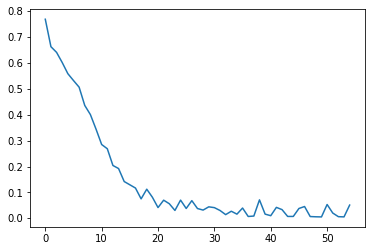

Epoch 1/100
22/22 - 5s - loss: 0.7595 - accuracy: 0.5908 - auc_22: 0.5917 - precision_22: 0.5902 - recall_22: 0.5422 - f1_score: 0.6581 - val_loss: 0.7190 - val_accuracy: 0.4533 - val_auc_22: 0.6413 - val_precision_22: 0.4533 - val_recall_22: 1.0000 - val_f1_score: 0.6239 - 5s/epoch - 238ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6435 - accuracy: 0.6381 - auc_22: 0.6820 - precision_22: 0.6355 - recall_22: 0.6145 - f1_score: 0.6581 - val_loss: 0.7350 - val_accuracy: 0.4533 - val_auc_22: 0.6184 - val_precision_22: 0.4507 - val_recall_22: 0.9412 - val_f1_score: 0.6239 - 983ms/epoch - 45ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6086 - accuracy: 0.6883 - auc_22: 0.7327 - precision_22: 0.6744 - recall_22: 0.7048 - f1_score: 0.6581 - val_loss: 0.7139 - val_accuracy: 0.5467 - val_auc_22: 0.6159 - val_precision_22: 0.0000e+00 - val_recall_22: 0.0000e+00 - val_f1_score: 0.6239 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5776 - accuracy: 0.7031 - auc_22: 0.7685 - precision_22: 0.7331 - r

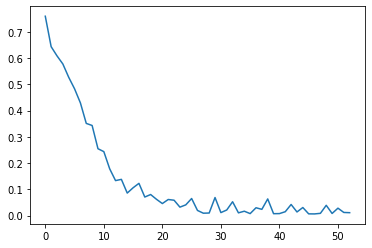

Epoch 1/100
22/22 - 5s - loss: 0.7151 - accuracy: 0.5598 - auc_23: 0.5944 - precision_23: 0.5478 - recall_23: 0.5244 - f1_score: 0.6527 - val_loss: 0.6972 - val_accuracy: 0.5067 - val_auc_23: 0.6501 - val_precision_23: 0.5067 - val_recall_23: 1.0000 - val_f1_score: 0.6726 - 5s/epoch - 226ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6456 - accuracy: 0.6381 - auc_23: 0.6782 - precision_23: 0.6189 - recall_23: 0.6585 - f1_score: 0.6527 - val_loss: 0.6986 - val_accuracy: 0.5467 - val_auc_23: 0.6415 - val_precision_23: 0.7500 - val_recall_23: 0.1579 - val_f1_score: 0.6726 - 937ms/epoch - 43ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6115 - accuracy: 0.6603 - auc_23: 0.7256 - precision_23: 0.6667 - recall_23: 0.5976 - f1_score: 0.6527 - val_loss: 0.7762 - val_accuracy: 0.5733 - val_auc_23: 0.6785 - val_precision_23: 0.7500 - val_recall_23: 0.2368 - val_f1_score: 0.6726 - 940ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5799 - accuracy: 0.6839 - auc_23: 0.7605 - precision_23: 0.6839 - recall

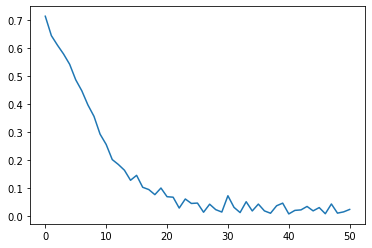

Epoch 1/100
22/22 - 5s - loss: 0.7149 - accuracy: 0.5879 - auc_24: 0.6048 - precision_24: 0.5831 - recall_24: 0.5778 - f1_score: 0.6607 - val_loss: 0.6856 - val_accuracy: 0.5733 - val_auc_24: 0.4996 - val_precision_24: 0.0000e+00 - val_recall_24: 0.0000e+00 - val_f1_score: 0.5981 - 5s/epoch - 224ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6491 - accuracy: 0.6366 - auc_24: 0.6683 - precision_24: 0.6517 - recall_24: 0.5659 - f1_score: 0.6607 - val_loss: 0.7686 - val_accuracy: 0.4400 - val_auc_24: 0.5134 - val_precision_24: 0.3958 - val_recall_24: 0.5938 - val_f1_score: 0.5981 - 943ms/epoch - 43ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6058 - accuracy: 0.6529 - auc_24: 0.7257 - precision_24: 0.6533 - recall_24: 0.6317 - f1_score: 0.6607 - val_loss: 0.8125 - val_accuracy: 0.4133 - val_auc_24: 0.5040 - val_precision_24: 0.4062 - val_recall_24: 0.8125 - val_f1_score: 0.5981 - 934ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5804 - accuracy: 0.6898 - auc_24: 0.7585 - precision_24: 0.6834 

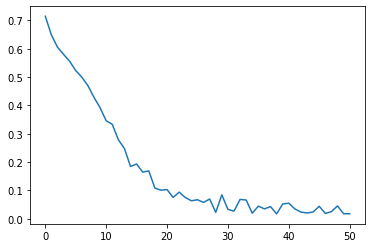

Epoch 1/100
22/22 - 5s - loss: 0.7677 - accuracy: 0.5672 - auc_25: 0.5910 - precision_25: 0.5662 - recall_25: 0.4681 - f1_score: 0.6541 - val_loss: 0.6424 - val_accuracy: 0.6667 - val_auc_25: 0.7400 - val_precision_25: 0.6667 - val_recall_25: 0.6486 - val_f1_score: 0.6607 - 5s/epoch - 238ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6479 - accuracy: 0.6411 - auc_25: 0.6766 - precision_25: 0.6311 - recall_25: 0.6292 - f1_score: 0.6541 - val_loss: 0.6827 - val_accuracy: 0.5067 - val_auc_25: 0.7496 - val_precision_25: 0.0000e+00 - val_recall_25: 0.0000e+00 - val_f1_score: 0.6607 - 909ms/epoch - 41ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6271 - accuracy: 0.6750 - auc_25: 0.7040 - precision_25: 0.6912 - recall_25: 0.5988 - f1_score: 0.6541 - val_loss: 0.5938 - val_accuracy: 0.7333 - val_auc_25: 0.7585 - val_precision_25: 0.7931 - val_recall_25: 0.6216 - val_f1_score: 0.6607 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5812 - accuracy: 0.6928 - auc_25: 0.7575 - precision_25: 0.6885 - r

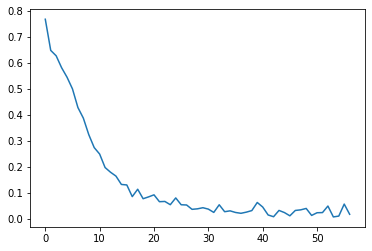

Epoch 1/100
22/22 - 5s - loss: 0.7221 - accuracy: 0.5879 - auc_26: 0.6051 - precision_26: 0.5892 - recall_26: 0.5271 - f1_score: 0.6581 - val_loss: 0.6774 - val_accuracy: 0.5733 - val_auc_26: 0.7471 - val_precision_26: 1.0000 - val_recall_26: 0.0588 - val_f1_score: 0.6239 - 5s/epoch - 224ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6357 - accuracy: 0.6662 - auc_26: 0.7004 - precision_26: 0.6767 - recall_26: 0.6114 - f1_score: 0.6581 - val_loss: 0.6490 - val_accuracy: 0.6133 - val_auc_26: 0.7493 - val_precision_26: 0.8571 - val_recall_26: 0.1765 - val_f1_score: 0.6239 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5989 - accuracy: 0.6898 - auc_26: 0.7448 - precision_26: 0.6981 - recall_26: 0.6476 - f1_score: 0.6581 - val_loss: 0.8287 - val_accuracy: 0.5733 - val_auc_26: 0.7511 - val_precision_26: 1.0000 - val_recall_26: 0.0588 - val_f1_score: 0.6239 - 954ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5689 - accuracy: 0.7223 - auc_26: 0.7767 - precision_26: 0.7353 - recall_26

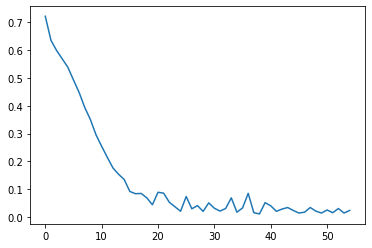

Epoch 1/100
22/22 - 5s - loss: 0.7337 - accuracy: 0.5805 - auc_27: 0.5979 - precision_27: 0.5741 - recall_27: 0.5498 - f1_score: 0.6567 - val_loss: 0.7337 - val_accuracy: 0.4667 - val_auc_27: 0.5793 - val_precision_27: 0.4667 - val_recall_27: 1.0000 - val_f1_score: 0.6364 - 5s/epoch - 239ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6357 - accuracy: 0.6470 - auc_27: 0.6916 - precision_27: 0.6484 - recall_27: 0.6073 - f1_score: 0.6567 - val_loss: 0.9566 - val_accuracy: 0.4667 - val_auc_27: 0.3986 - val_precision_27: 0.4667 - val_recall_27: 1.0000 - val_f1_score: 0.6364 - 923ms/epoch - 42ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6083 - accuracy: 0.6780 - auc_27: 0.7323 - precision_27: 0.6687 - recall_27: 0.6767 - f1_score: 0.6567 - val_loss: 0.7834 - val_accuracy: 0.3733 - val_auc_27: 0.3396 - val_precision_27: 0.3125 - val_recall_27: 0.2857 - val_f1_score: 0.6364 - 953ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5721 - accuracy: 0.6839 - auc_27: 0.7693 - precision_27: 0.6789 - recall

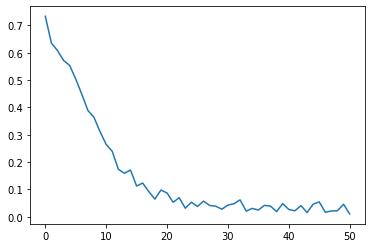

Epoch 1/100
22/22 - 5s - loss: 0.7292 - accuracy: 0.5968 - auc_28: 0.6124 - precision_28: 0.5844 - recall_28: 0.5538 - f1_score: 0.6487 - val_loss: 0.7112 - val_accuracy: 0.5733 - val_auc_28: 0.6047 - val_precision_28: 0.5763 - val_recall_28: 0.8293 - val_f1_score: 0.7069 - 5s/epoch - 222ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6367 - accuracy: 0.6499 - auc_28: 0.6953 - precision_28: 0.6341 - recall_28: 0.6400 - f1_score: 0.6487 - val_loss: 0.7948 - val_accuracy: 0.4533 - val_auc_28: 0.5829 - val_precision_28: 0.0000e+00 - val_recall_28: 0.0000e+00 - val_f1_score: 0.7069 - 917ms/epoch - 42ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6277 - accuracy: 0.6691 - auc_28: 0.7054 - precision_28: 0.6634 - recall_28: 0.6308 - f1_score: 0.6487 - val_loss: 0.8356 - val_accuracy: 0.5200 - val_auc_28: 0.6478 - val_precision_28: 0.7778 - val_recall_28: 0.1707 - val_f1_score: 0.7069 - 951ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5826 - accuracy: 0.6972 - auc_28: 0.7630 - precision_28: 0.6935 

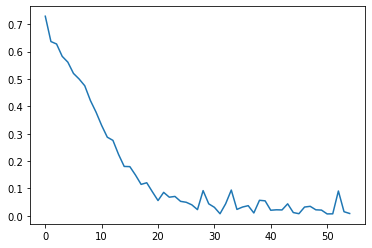

Epoch 1/100
22/22 - 5s - loss: 0.7743 - accuracy: 0.6204 - auc_29: 0.6227 - precision_29: 0.6291 - recall_29: 0.5672 - f1_score: 0.6621 - val_loss: 0.6891 - val_accuracy: 0.5867 - val_auc_29: 0.3299 - val_precision_29: 0.0000e+00 - val_recall_29: 0.0000e+00 - val_f1_score: 0.5849 - 5s/epoch - 225ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6263 - accuracy: 0.6691 - auc_29: 0.7030 - precision_29: 0.6881 - recall_29: 0.6060 - f1_score: 0.6621 - val_loss: 0.6755 - val_accuracy: 0.5867 - val_auc_29: 0.6441 - val_precision_29: 0.5000 - val_recall_29: 0.6129 - val_f1_score: 0.5849 - 1s/epoch - 53ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6089 - accuracy: 0.6677 - auc_29: 0.7327 - precision_29: 0.6536 - recall_29: 0.6985 - f1_score: 0.6621 - val_loss: 0.8102 - val_accuracy: 0.4533 - val_auc_29: 0.6235 - val_precision_29: 0.4286 - val_recall_29: 0.9677 - val_f1_score: 0.5849 - 935ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5874 - accuracy: 0.6928 - auc_29: 0.7554 - precision_29: 0.6851 - r

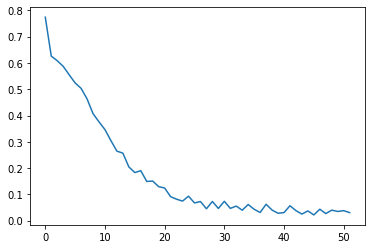

In [22]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_face_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_face_model.save(model_path / 'face_binary_cnnlstm.h5')

#### Training performance

In [23]:
face_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
face_cnnlstm_train_results

{'Accuracy': 0.9929061830043793,
 'ROC/AUC': 0.9991709291934967,
 'Precision': 0.991230970621109,
 'Recall': 0.9942266702651977,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [24]:
face_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
face_cnnlstm_val_results

{'Accuracy': 0.6541754364967346,
 'ROC/AUC': 0.6945238471031189,
 'Precision': 0.6295056462287902,
 'Recall': 0.6843771994113922,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [25]:
cnnlstm_binary_face_model = load_model(model_path / 'face_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_face_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 16ms/step - loss: 1.0015 - accuracy: 0.4515 - auc_20: 0.5887 - precision_20: 0.9375 - recall_20: 0.3896 - f1_score: 0.9259
Accuracy: 45.15% 
ROC/AUC: 0.59 
Precision: 0.94 
Recall: 0.39 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

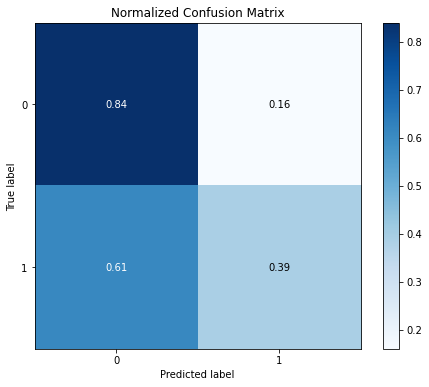

In [26]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

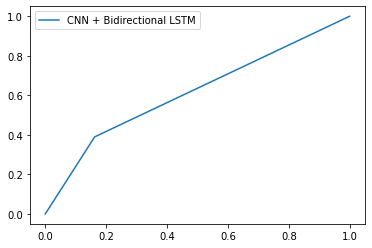

In [27]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

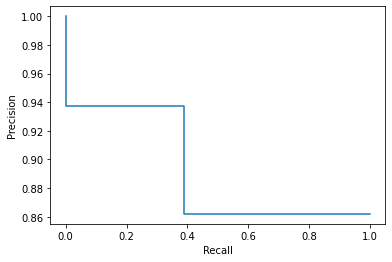

In [28]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 2.2 RCNN

Epoch 1/100
22/22 - 2s - loss: 0.8248 - accuracy: 0.5237 - auc_30: 0.5196 - precision_30: 0.5063 - recall_30: 0.3692 - f1_score: 0.6494 - val_loss: 0.7576 - val_accuracy: 0.4474 - val_auc_30: 0.4415 - val_precision_30: 0.0000e+00 - val_recall_30: 0.0000e+00 - val_f1_score: 0.7009 - 2s/epoch - 80ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7527 - accuracy: 0.5503 - auc_30: 0.5621 - precision_30: 0.5882 - recall_30: 0.2154 - f1_score: 0.6494 - val_loss: 0.6991 - val_accuracy: 0.5395 - val_auc_30: 0.4857 - val_precision_30: 0.5395 - val_recall_30: 1.0000 - val_f1_score: 0.7009 - 323ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7162 - accuracy: 0.5932 - auc_30: 0.6323 - precision_30: 0.5648 - recall_30: 0.6708 - f1_score: 0.6494 - val_loss: 0.6815 - val_accuracy: 0.5526 - val_auc_30: 0.5143 - val_precision_30: 0.5467 - val_recall_30: 1.0000 - val_f1_score: 0.7009 - 341ms/epoch - 15ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6874 - accuracy: 0.5192 - auc_30: 0.5577 - precision_30: 0.5000 -

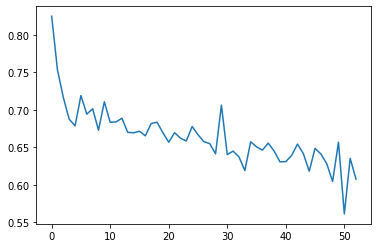

Epoch 1/100
22/22 - 2s - loss: 0.8994 - accuracy: 0.5059 - auc_31: 0.5295 - precision_31: 0.4849 - recall_31: 0.5480 - f1_score: 0.6473 - val_loss: 1.2072 - val_accuracy: 0.5263 - val_auc_31: 0.5197 - val_precision_31: 0.5479 - val_recall_31: 0.9302 - val_f1_score: 0.7119 - 2s/epoch - 80ms/step
Epoch 2/100
22/22 - 0s - loss: 0.8262 - accuracy: 0.4837 - auc_31: 0.5162 - precision_31: 0.4677 - recall_31: 0.5820 - f1_score: 0.6473 - val_loss: 1.7706 - val_accuracy: 0.5000 - val_auc_31: 0.4401 - val_precision_31: 0.5352 - val_recall_31: 0.8837 - val_f1_score: 0.7227 - 301ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7246 - accuracy: 0.5577 - auc_31: 0.5711 - precision_31: 0.5400 - recall_31: 0.5015 - f1_score: 0.6473 - val_loss: 1.0996 - val_accuracy: 0.5526 - val_auc_31: 0.5310 - val_precision_31: 0.5600 - val_recall_31: 0.9767 - val_f1_score: 0.7227 - 314ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7500 - accuracy: 0.5414 - auc_31: 0.5687 - precision_31: 0.5267 - recall_

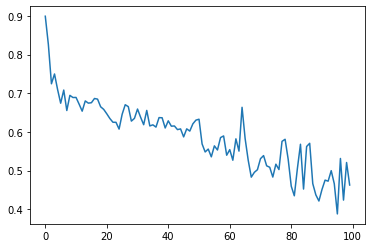

Epoch 1/100
22/22 - 2s - loss: 0.8563 - accuracy: 0.5111 - auc_32: 0.5342 - precision_32: 0.5012 - recall_32: 0.6506 - f1_score: 0.6581 - val_loss: 0.7976 - val_accuracy: 0.4400 - val_auc_32: 0.4853 - val_precision_32: 0.4459 - val_recall_32: 0.9706 - val_f1_score: 0.6239 - 2s/epoch - 78ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6964 - accuracy: 0.5643 - auc_32: 0.5903 - precision_32: 0.5478 - recall_32: 0.6386 - f1_score: 0.6581 - val_loss: 0.6902 - val_accuracy: 0.4533 - val_auc_32: 0.5147 - val_precision_32: 0.4533 - val_recall_32: 1.0000 - val_f1_score: 0.6239 - 281ms/epoch - 13ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7776 - accuracy: 0.4963 - auc_32: 0.4995 - precision_32: 0.4830 - recall_32: 0.3855 - f1_score: 0.6581 - val_loss: 0.6887 - val_accuracy: 0.4533 - val_auc_32: 0.5147 - val_precision_32: 0.4533 - val_recall_32: 1.0000 - val_f1_score: 0.6239 - 275ms/epoch - 12ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7508 - accuracy: 0.5244 - auc_32: 0.5613 - precision_32: 0.5152 - recall_

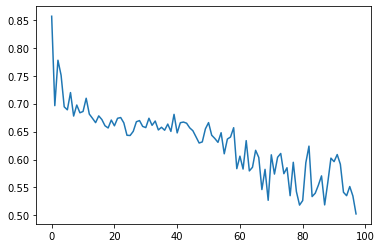

Epoch 1/100
22/22 - 2s - loss: 1.1652 - accuracy: 0.4934 - auc_33: 0.4919 - precision_33: 0.4791 - recall_33: 0.5244 - f1_score: 0.6527 - val_loss: 0.6747 - val_accuracy: 0.5200 - val_auc_33: 0.5263 - val_precision_33: 1.0000 - val_recall_33: 0.0526 - val_f1_score: 0.6726 - 2s/epoch - 74ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7012 - accuracy: 0.5303 - auc_33: 0.5709 - precision_33: 0.5119 - recall_33: 0.6555 - f1_score: 0.6527 - val_loss: 0.6746 - val_accuracy: 0.5200 - val_auc_33: 0.5263 - val_precision_33: 1.0000 - val_recall_33: 0.0526 - val_f1_score: 0.6726 - 294ms/epoch - 13ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6901 - accuracy: 0.4963 - auc_33: 0.5401 - precision_33: 0.4888 - recall_33: 0.8628 - f1_score: 0.6527 - val_loss: 0.6747 - val_accuracy: 0.5200 - val_auc_33: 0.5263 - val_precision_33: 1.0000 - val_recall_33: 0.0526 - val_f1_score: 0.6726 - 281ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6821 - accuracy: 0.5953 - auc_33: 0.6051 - precision_33: 0.6552 - recall_

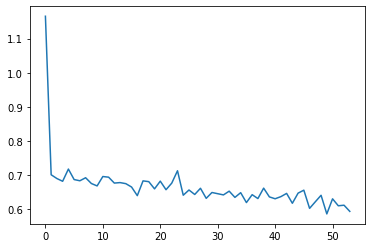

Epoch 1/100
22/22 - 2s - loss: 1.0100 - accuracy: 0.4934 - auc_34: 0.5206 - precision_34: 0.4892 - recall_34: 0.6108 - f1_score: 0.6607 - val_loss: 1.4385 - val_accuracy: 0.4400 - val_auc_34: 0.5908 - val_precision_34: 0.4324 - val_recall_34: 1.0000 - val_f1_score: 0.5981 - 2s/epoch - 85ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7233 - accuracy: 0.5126 - auc_34: 0.5327 - precision_34: 0.5053 - recall_34: 0.5719 - f1_score: 0.6607 - val_loss: 0.8737 - val_accuracy: 0.5600 - val_auc_34: 0.5000 - val_precision_34: 0.0000e+00 - val_recall_34: 0.0000e+00 - val_f1_score: 0.5981 - 262ms/epoch - 12ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6911 - accuracy: 0.5510 - auc_34: 0.5755 - precision_34: 0.5949 - recall_34: 0.2814 - f1_score: 0.6607 - val_loss: 1.0352 - val_accuracy: 0.4267 - val_auc_34: 0.4767 - val_precision_34: 0.4267 - val_recall_34: 1.0000 - val_f1_score: 0.5981 - 259ms/epoch - 12ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6791 - accuracy: 0.5480 - auc_34: 0.5676 - precision_34: 0.5714 -

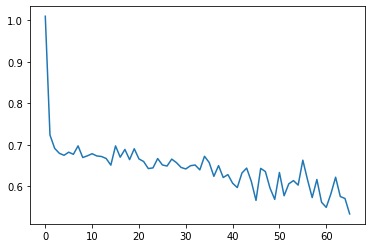

Epoch 1/100
22/22 - 2s - loss: 0.9701 - accuracy: 0.4742 - auc_35: 0.4688 - precision_35: 0.4649 - recall_35: 0.5441 - f1_score: 0.6541 - val_loss: 0.6742 - val_accuracy: 0.5333 - val_auc_35: 0.5270 - val_precision_35: 1.0000 - val_recall_35: 0.0541 - val_f1_score: 0.6607 - 2s/epoch - 73ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6989 - accuracy: 0.5318 - auc_35: 0.5532 - precision_35: 0.5144 - recall_35: 0.6505 - f1_score: 0.6541 - val_loss: 0.8487 - val_accuracy: 0.5067 - val_auc_35: 0.4730 - val_precision_35: 0.0000e+00 - val_recall_35: 0.0000e+00 - val_f1_score: 0.6607 - 288ms/epoch - 13ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7100 - accuracy: 0.5495 - auc_35: 0.5515 - precision_35: 0.6429 - recall_35: 0.1641 - f1_score: 0.6541 - val_loss: 0.6749 - val_accuracy: 0.4933 - val_auc_35: 0.5270 - val_precision_35: 0.4933 - val_recall_35: 1.0000 - val_f1_score: 0.6607 - 260ms/epoch - 12ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7016 - accuracy: 0.5229 - auc_35: 0.5613 - precision_35: 0.5062 -

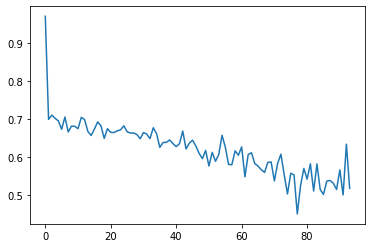

Epoch 1/100
22/22 - 2s - loss: 1.1158 - accuracy: 0.4993 - auc_36: 0.4925 - precision_36: 0.4918 - recall_36: 0.6355 - f1_score: 0.6581 - val_loss: 0.7637 - val_accuracy: 0.5600 - val_auc_36: 0.5603 - val_precision_36: 0.6667 - val_recall_36: 0.0588 - val_f1_score: 0.6239 - 2s/epoch - 73ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7746 - accuracy: 0.5258 - auc_36: 0.5412 - precision_36: 0.5162 - recall_36: 0.5271 - f1_score: 0.6581 - val_loss: 0.6802 - val_accuracy: 0.4533 - val_auc_36: 0.5179 - val_precision_36: 0.4533 - val_recall_36: 1.0000 - val_f1_score: 0.6239 - 303ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7025 - accuracy: 0.5318 - auc_36: 0.5387 - precision_36: 0.5193 - recall_36: 0.6084 - f1_score: 0.6581 - val_loss: 0.6850 - val_accuracy: 0.4533 - val_auc_36: 0.5179 - val_precision_36: 0.4533 - val_recall_36: 1.0000 - val_f1_score: 0.6239 - 267ms/epoch - 12ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6995 - accuracy: 0.5436 - auc_36: 0.5754 - precision_36: 0.5473 - recall_

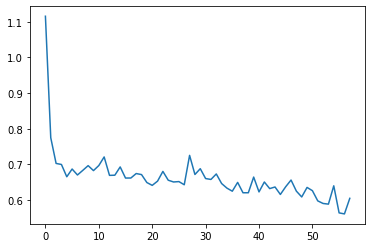

Epoch 1/100
22/22 - 2s - loss: 1.0339 - accuracy: 0.4712 - auc_37: 0.4691 - precision_37: 0.4533 - recall_37: 0.3958 - f1_score: 0.6554 - val_loss: 1.2470 - val_accuracy: 0.4667 - val_auc_37: 0.4875 - val_precision_37: 0.4667 - val_recall_37: 1.0000 - val_f1_score: 0.6364 - 2s/epoch - 74ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7061 - accuracy: 0.5716 - auc_37: 0.5967 - precision_37: 0.5919 - recall_37: 0.3988 - f1_score: 0.6567 - val_loss: 0.9803 - val_accuracy: 0.4667 - val_auc_37: 0.4875 - val_precision_37: 0.4667 - val_recall_37: 1.0000 - val_f1_score: 0.6364 - 310ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7064 - accuracy: 0.5908 - auc_37: 0.6322 - precision_37: 0.5549 - recall_37: 0.8248 - f1_score: 0.6567 - val_loss: 0.8573 - val_accuracy: 0.4667 - val_auc_37: 0.4875 - val_precision_37: 0.4667 - val_recall_37: 1.0000 - val_f1_score: 0.6364 - 306ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6873 - accuracy: 0.5465 - auc_37: 0.6110 - precision_37: 0.5251 - recall_

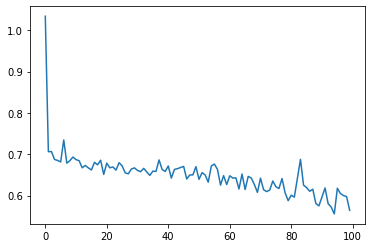

Epoch 1/100
22/22 - 2s - loss: 1.0628 - accuracy: 0.4742 - auc_38: 0.4800 - precision_38: 0.4595 - recall_38: 0.5415 - f1_score: 0.6474 - val_loss: 0.6361 - val_accuracy: 0.5733 - val_auc_38: 0.5689 - val_precision_38: 0.5616 - val_recall_38: 1.0000 - val_f1_score: 0.7069 - 2s/epoch - 75ms/step
Epoch 2/100
22/22 - 0s - loss: 0.8149 - accuracy: 0.5391 - auc_38: 0.5451 - precision_38: 0.5367 - recall_38: 0.2923 - f1_score: 0.6487 - val_loss: 0.6398 - val_accuracy: 0.5733 - val_auc_38: 0.5621 - val_precision_38: 0.5616 - val_recall_38: 1.0000 - val_f1_score: 0.7069 - 300ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6895 - accuracy: 0.5465 - auc_38: 0.5876 - precision_38: 0.5285 - recall_38: 0.5138 - f1_score: 0.6487 - val_loss: 0.6454 - val_accuracy: 0.5733 - val_auc_38: 0.5753 - val_precision_38: 0.5616 - val_recall_38: 1.0000 - val_f1_score: 0.7069 - 310ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6964 - accuracy: 0.5111 - auc_38: 0.5518 - precision_38: 0.4925 - recall_

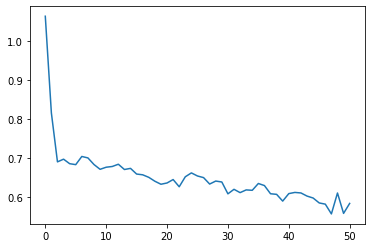

Epoch 1/100
22/22 - 2s - loss: 1.1507 - accuracy: 0.5096 - auc_39: 0.5247 - precision_39: 0.5046 - recall_39: 0.4925 - f1_score: 0.6621 - val_loss: 0.7156 - val_accuracy: 0.4133 - val_auc_39: 0.5000 - val_precision_39: 0.4133 - val_recall_39: 1.0000 - val_f1_score: 0.5849 - 2s/epoch - 73ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7015 - accuracy: 0.5524 - auc_39: 0.5756 - precision_39: 0.5606 - recall_39: 0.4418 - f1_score: 0.6621 - val_loss: 0.6956 - val_accuracy: 0.4133 - val_auc_39: 0.5000 - val_precision_39: 0.4133 - val_recall_39: 1.0000 - val_f1_score: 0.5849 - 312ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7623 - accuracy: 0.5037 - auc_39: 0.5526 - precision_39: 0.4989 - recall_39: 0.6836 - f1_score: 0.6621 - val_loss: 0.6851 - val_accuracy: 0.5867 - val_auc_39: 0.4985 - val_precision_39: 0.0000e+00 - val_recall_39: 0.0000e+00 - val_f1_score: 0.5849 - 287ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7640 - accuracy: 0.5052 - auc_39: 0.5404 - precision_39: 0.5000 -

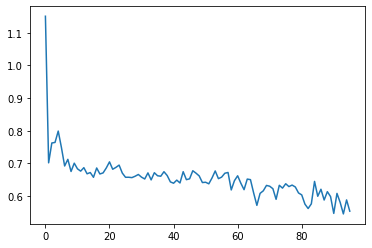

In [29]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_face_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_face_model.save(model_path / 'face_binary_rcnn.h5')

#### Training performance

In [30]:
face_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
face_rcnn_train_results

{'Accuracy': 0.6606122076511383,
 'ROC/AUC': 0.7394392967224122,
 'Precision': 0.7941270112991333,
 'Recall': 0.4217653959989548,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [31]:
face_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
face_rcnn_val_results

{'Accuracy': 0.5359824508428573,
 'ROC/AUC': 0.5245354115962982,
 'Precision': 0.5560000002384186,
 'Recall': 0.1269226076081395,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [32]:
rcnn_binary_face_model = load_model(model_path / 'face_binary_rcnn.h5')
y_pred = rcnn_binary_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_face_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 9ms/step - loss: 0.6695 - accuracy: 0.8657 - auc_30: 0.5153 - precision_30: 0.8679 - recall_30: 0.9957 - f1_score: 0.9259
Accuracy: 86.57% 
ROC/AUC: 0.52 
Precision: 0.87 
Recall: 1.00 
F1 score: 0.93


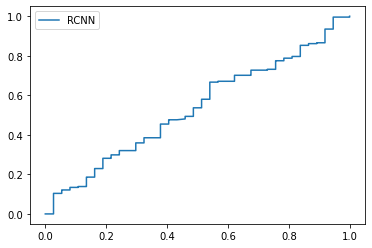

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

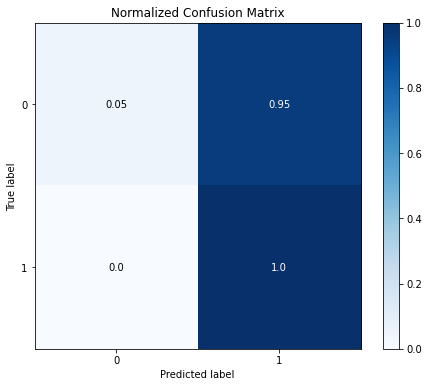

In [34]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

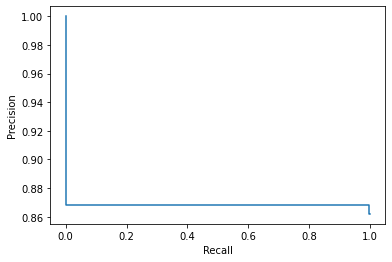

In [35]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 3. Multimodal Early Fusion

In [36]:
X_train, X_test, y_train, y_test = load_fusioned_dataset(binary=True)
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[2], X_train.shape[-1], y_train.shape[1]

(752, 1, 350, 60) (752, 1)
(268, 1, 350, 60) (268, 1)


### 3.1 CNN + BiLSTM

Epoch 1/100
22/22 - 5s - loss: 0.7105 - accuracy: 0.6109 - auc_40: 0.6148 - precision_40: 0.6140 - recall_40: 0.5138 - f1_score: 0.6494 - val_loss: 0.7461 - val_accuracy: 0.5395 - val_auc_40: 0.6446 - val_precision_40: 0.5395 - val_recall_40: 1.0000 - val_f1_score: 0.7009 - 5s/epoch - 211ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6192 - accuracy: 0.6598 - auc_40: 0.7092 - precision_40: 0.6599 - recall_40: 0.6031 - f1_score: 0.6494 - val_loss: 0.7898 - val_accuracy: 0.5395 - val_auc_40: 0.6505 - val_precision_40: 0.5395 - val_recall_40: 1.0000 - val_f1_score: 0.7009 - 851ms/epoch - 39ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6002 - accuracy: 0.6908 - auc_40: 0.7374 - precision_40: 0.6908 - recall_40: 0.6462 - f1_score: 0.6494 - val_loss: 0.7052 - val_accuracy: 0.5658 - val_auc_40: 0.6777 - val_precision_40: 0.5588 - val_recall_40: 0.9268 - val_f1_score: 0.7009 - 1s/epoch - 47ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5341 - accuracy: 0.7263 - auc_40: 0.8001 - precision_40: 0.7365 - recall_40

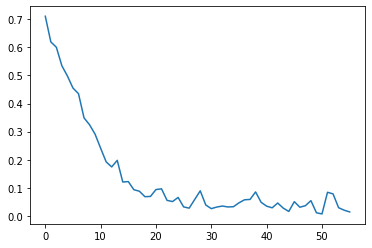

Epoch 1/100
22/22 - 5s - loss: 0.7586 - accuracy: 0.5607 - auc_41: 0.5833 - precision_41: 0.5430 - recall_41: 0.5077 - f1_score: 0.6466 - val_loss: 0.7026 - val_accuracy: 0.5526 - val_auc_41: 0.6547 - val_precision_41: 0.7647 - val_recall_41: 0.3023 - val_f1_score: 0.7227 - 5s/epoch - 237ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6445 - accuracy: 0.6479 - auc_41: 0.6841 - precision_41: 0.6451 - recall_41: 0.5851 - f1_score: 0.6466 - val_loss: 0.7203 - val_accuracy: 0.4474 - val_auc_41: 0.8020 - val_precision_41: 1.0000 - val_recall_41: 0.0233 - val_f1_score: 0.7227 - 973ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6260 - accuracy: 0.6420 - auc_41: 0.7050 - precision_41: 0.6506 - recall_41: 0.5418 - f1_score: 0.6466 - val_loss: 0.7041 - val_accuracy: 0.5658 - val_auc_41: 0.7657 - val_precision_41: 1.0000 - val_recall_41: 0.2326 - val_f1_score: 0.7227 - 955ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5910 - accuracy: 0.6938 - auc_41: 0.7546 - precision_41: 0.7014 - recall

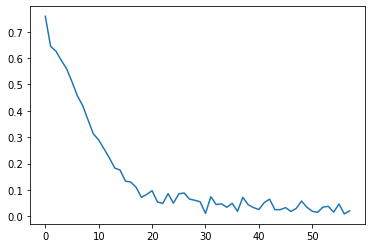

Epoch 1/100
22/22 - 5s - loss: 0.7177 - accuracy: 0.5805 - auc_42: 0.6099 - precision_42: 0.5736 - recall_42: 0.5633 - f1_score: 0.6581 - val_loss: 0.8374 - val_accuracy: 0.5600 - val_auc_42: 0.6090 - val_precision_42: 1.0000 - val_recall_42: 0.0294 - val_f1_score: 0.6239 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6242 - accuracy: 0.6558 - auc_42: 0.7081 - precision_42: 0.6854 - recall_42: 0.5512 - f1_score: 0.6581 - val_loss: 0.8711 - val_accuracy: 0.4400 - val_auc_42: 0.6324 - val_precision_42: 0.4459 - val_recall_42: 0.9706 - val_f1_score: 0.6239 - 976ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5993 - accuracy: 0.6839 - auc_42: 0.7393 - precision_42: 0.6967 - recall_42: 0.6295 - f1_score: 0.6581 - val_loss: 1.0359 - val_accuracy: 0.4800 - val_auc_42: 0.6424 - val_precision_42: 0.4615 - val_recall_42: 0.8824 - val_f1_score: 0.6239 - 934ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5667 - accuracy: 0.7253 - auc_42: 0.7798 - precision_42: 0.7535 - recall

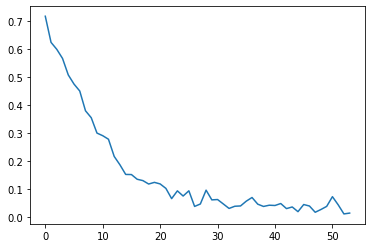

Epoch 1/100
22/22 - 5s - loss: 0.7443 - accuracy: 0.5908 - auc_43: 0.6053 - precision_43: 0.5831 - recall_43: 0.5457 - f1_score: 0.6527 - val_loss: 0.6780 - val_accuracy: 0.6000 - val_auc_43: 0.6707 - val_precision_43: 0.5645 - val_recall_43: 0.9211 - val_f1_score: 0.6726 - 5s/epoch - 232ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6301 - accuracy: 0.6573 - auc_43: 0.7049 - precision_43: 0.6558 - recall_43: 0.6159 - f1_score: 0.6527 - val_loss: 0.7404 - val_accuracy: 0.5600 - val_auc_43: 0.6721 - val_precision_43: 0.5385 - val_recall_43: 0.9211 - val_f1_score: 0.6726 - 936ms/epoch - 43ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6043 - accuracy: 0.6957 - auc_43: 0.7384 - precision_43: 0.6968 - recall_43: 0.6585 - f1_score: 0.6527 - val_loss: 0.6429 - val_accuracy: 0.6000 - val_auc_43: 0.6700 - val_precision_43: 0.6176 - val_recall_43: 0.5526 - val_f1_score: 0.6726 - 1s/epoch - 54ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5554 - accuracy: 0.7061 - auc_43: 0.7865 - precision_43: 0.7232 - recall_43

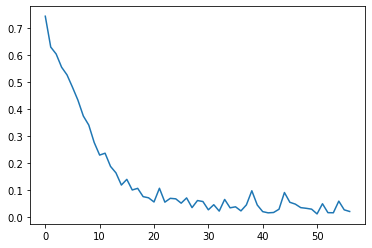

Epoch 1/100
22/22 - 5s - loss: 0.7373 - accuracy: 0.5864 - auc_44: 0.6128 - precision_44: 0.5865 - recall_44: 0.5479 - f1_score: 0.6607 - val_loss: 0.6720 - val_accuracy: 0.5733 - val_auc_44: 0.6174 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00 - val_f1_score: 0.5981 - 5s/epoch - 246ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6274 - accuracy: 0.6632 - auc_44: 0.7047 - precision_44: 0.6721 - recall_44: 0.6198 - f1_score: 0.6607 - val_loss: 0.6858 - val_accuracy: 0.5733 - val_auc_44: 0.6010 - val_precision_44: 0.0000e+00 - val_recall_44: 0.0000e+00 - val_f1_score: 0.5981 - 969ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5724 - accuracy: 0.7208 - auc_44: 0.7744 - precision_44: 0.7562 - recall_44: 0.6407 - f1_score: 0.6607 - val_loss: 0.7171 - val_accuracy: 0.6267 - val_auc_44: 0.5828 - val_precision_44: 0.5714 - val_recall_44: 0.5000 - val_f1_score: 0.5981 - 921ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5668 - accuracy: 0.7134 - auc_44: 0.7773 - precision_44:

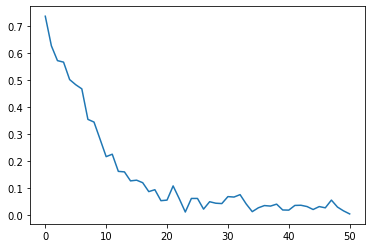

Epoch 1/100
22/22 - 5s - loss: 0.7522 - accuracy: 0.5864 - auc_45: 0.5993 - precision_45: 0.5891 - recall_45: 0.4924 - f1_score: 0.6541 - val_loss: 0.7126 - val_accuracy: 0.5067 - val_auc_45: 0.6394 - val_precision_45: 0.0000e+00 - val_recall_45: 0.0000e+00 - val_f1_score: 0.6607 - 5s/epoch - 226ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6478 - accuracy: 0.6278 - auc_45: 0.6709 - precision_45: 0.6380 - recall_45: 0.5410 - f1_score: 0.6541 - val_loss: 0.6516 - val_accuracy: 0.6133 - val_auc_45: 0.7354 - val_precision_45: 0.7000 - val_recall_45: 0.3784 - val_f1_score: 0.6607 - 1s/epoch - 54ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6079 - accuracy: 0.6425 - auc_45: 0.7255 - precision_45: 0.6445 - recall_45: 0.5897 - f1_score: 0.6541 - val_loss: 0.7741 - val_accuracy: 0.5467 - val_auc_45: 0.7738 - val_precision_45: 1.0000 - val_recall_45: 0.0811 - val_f1_score: 0.6607 - 926ms/epoch - 42ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5912 - accuracy: 0.6854 - auc_45: 0.7519 - precision_45: 0.7057 - r

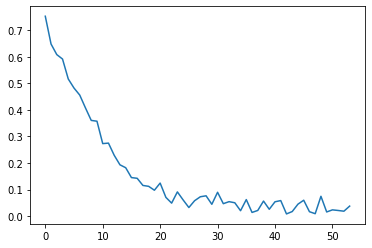

Epoch 1/100
22/22 - 5s - loss: 0.7162 - accuracy: 0.5835 - auc_46: 0.6023 - precision_46: 0.5772 - recall_46: 0.5633 - f1_score: 0.6581 - val_loss: 0.6397 - val_accuracy: 0.6933 - val_auc_46: 0.6854 - val_precision_46: 0.6486 - val_recall_46: 0.7059 - val_f1_score: 0.6239 - 5s/epoch - 242ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6359 - accuracy: 0.6529 - auc_46: 0.6941 - precision_46: 0.6570 - recall_46: 0.6114 - f1_score: 0.6581 - val_loss: 0.6456 - val_accuracy: 0.6133 - val_auc_46: 0.7425 - val_precision_46: 0.8571 - val_recall_46: 0.1765 - val_f1_score: 0.6239 - 904ms/epoch - 41ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5959 - accuracy: 0.6883 - auc_46: 0.7493 - precision_46: 0.6984 - recall_46: 0.6416 - f1_score: 0.6581 - val_loss: 0.7301 - val_accuracy: 0.5867 - val_auc_46: 0.7622 - val_precision_46: 0.8000 - val_recall_46: 0.1176 - val_f1_score: 0.6239 - 945ms/epoch - 43ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5743 - accuracy: 0.7031 - auc_46: 0.7701 - precision_46: 0.7205 - recall

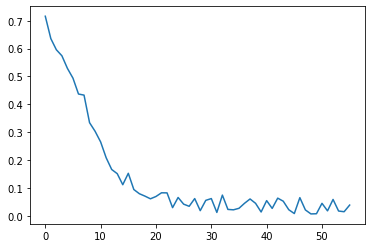

Epoch 1/100
22/22 - 5s - loss: 0.7674 - accuracy: 0.5672 - auc_47: 0.6014 - precision_47: 0.5590 - recall_47: 0.5438 - f1_score: 0.6567 - val_loss: 0.7422 - val_accuracy: 0.5333 - val_auc_47: 0.6300 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00 - val_f1_score: 0.6364 - 5s/epoch - 228ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6385 - accuracy: 0.6544 - auc_47: 0.6866 - precision_47: 0.6667 - recall_47: 0.5861 - f1_score: 0.6567 - val_loss: 0.7542 - val_accuracy: 0.5333 - val_auc_47: 0.6214 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00 - val_f1_score: 0.6364 - 966ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5941 - accuracy: 0.7001 - auc_47: 0.7489 - precision_47: 0.7092 - recall_47: 0.6556 - f1_score: 0.6567 - val_loss: 0.8554 - val_accuracy: 0.5333 - val_auc_47: 0.6082 - val_precision_47: 0.0000e+00 - val_recall_47: 0.0000e+00 - val_f1_score: 0.6364 - 970ms/epoch - 44ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5763 - accuracy: 0.7134 - auc_47: 0.7687 - preci

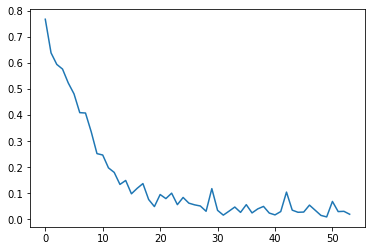

Epoch 1/100
22/22 - 5s - loss: 0.7314 - accuracy: 0.5938 - auc_48: 0.6112 - precision_48: 0.5868 - recall_48: 0.5200 - f1_score: 0.6487 - val_loss: 0.6909 - val_accuracy: 0.5733 - val_auc_48: 0.6707 - val_precision_48: 0.5634 - val_recall_48: 0.9756 - val_f1_score: 0.7069 - 5s/epoch - 223ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6446 - accuracy: 0.6381 - auc_48: 0.6858 - precision_48: 0.6170 - recall_48: 0.6492 - f1_score: 0.6487 - val_loss: 0.6419 - val_accuracy: 0.5867 - val_auc_48: 0.6704 - val_precision_48: 0.5962 - val_recall_48: 0.7561 - val_f1_score: 0.7069 - 1s/epoch - 54ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6169 - accuracy: 0.6617 - auc_48: 0.7201 - precision_48: 0.6558 - recall_48: 0.6215 - f1_score: 0.6487 - val_loss: 0.6287 - val_accuracy: 0.6533 - val_auc_48: 0.7027 - val_precision_48: 0.7419 - val_recall_48: 0.5610 - val_f1_score: 0.7069 - 1s/epoch - 54ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5683 - accuracy: 0.7090 - auc_48: 0.7777 - precision_48: 0.7162 - recall_48: 0

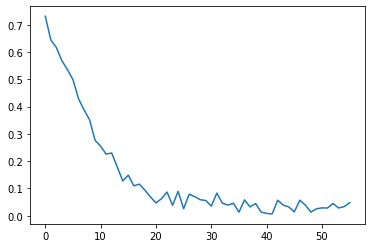

Epoch 1/100
22/22 - 5s - loss: 0.7446 - accuracy: 0.6041 - auc_49: 0.6207 - precision_49: 0.6136 - recall_49: 0.5403 - f1_score: 0.6621 - val_loss: 0.8644 - val_accuracy: 0.4133 - val_auc_49: 0.7071 - val_precision_49: 0.4133 - val_recall_49: 1.0000 - val_f1_score: 0.5849 - 5s/epoch - 239ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6266 - accuracy: 0.6677 - auc_49: 0.7028 - precision_49: 0.6821 - recall_49: 0.6149 - f1_score: 0.6621 - val_loss: 1.2220 - val_accuracy: 0.4133 - val_auc_49: 0.5766 - val_precision_49: 0.4133 - val_recall_49: 1.0000 - val_f1_score: 0.5849 - 969ms/epoch - 44ms/step
Epoch 3/100
22/22 - 1s - loss: 0.6040 - accuracy: 0.6809 - auc_49: 0.7477 - precision_49: 0.6865 - recall_49: 0.6537 - f1_score: 0.6621 - val_loss: 0.8393 - val_accuracy: 0.5067 - val_auc_49: 0.5693 - val_precision_49: 0.4423 - val_recall_49: 0.7419 - val_f1_score: 0.5849 - 1s/epoch - 53ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5503 - accuracy: 0.7179 - auc_49: 0.7923 - precision_49: 0.7278 - recall_49

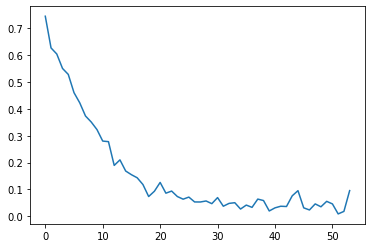

In [37]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_earlyfusion_model = CNNLSTM(n_features, None, n_length, n_outputs)
    history = cnnlstm_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_earlyfusion_model.save(model_path / 'early_binary_cnnlstm.h5')

#### Training performance

In [38]:
early_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
early_cnnlstm_train_results

{'Accuracy': 0.9905445575714111,
 'ROC/AUC': 0.9981567203998566,
 'Precision': 0.988261240720749,
 'Recall': 0.9924276411533356,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [39]:
early_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
early_cnnlstm_val_results

{'Accuracy': 0.6994210481643677,
 'ROC/AUC': 0.7514641344547272,
 'Precision': 0.6756654202938079,
 'Recall': 0.7258549690246582,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [40]:
cnnlstm_binary_earlyfusion_model = load_model(model_path / 'early_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = cnnlstm_binary_earlyfusion_model.evaluate(X_test, y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 15ms/step - loss: 0.9506 - accuracy: 0.4403 - auc_46: 0.6148 - precision_46: 0.9091 - recall_46: 0.3896 - f1_score: 0.9259
Accuracy: 44.03% 
ROC/AUC: 0.61 
Precision: 0.91 
Recall: 0.39 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

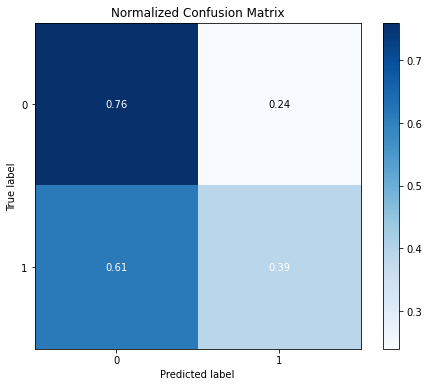

In [41]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

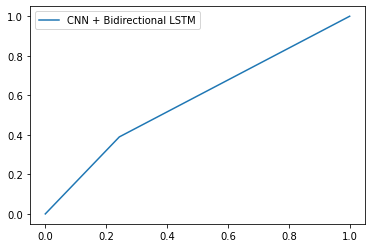

In [42]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

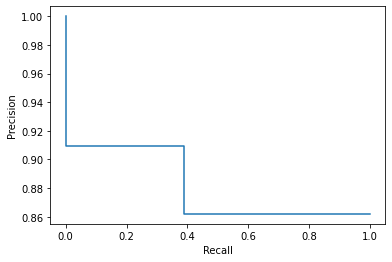

In [43]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 3.2 RCNN

Epoch 1/100
22/22 - 2s - loss: 0.8792 - accuracy: 0.5118 - auc_50: 0.5129 - precision_50: 0.4932 - recall_50: 0.5600 - f1_score: 0.6494 - val_loss: 0.6875 - val_accuracy: 0.4605 - val_auc_50: 0.5143 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 2s/epoch - 81ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7295 - accuracy: 0.5251 - auc_50: 0.5446 - precision_50: 0.5077 - recall_50: 0.4062 - f1_score: 0.6494 - val_loss: 0.6942 - val_accuracy: 0.4605 - val_auc_50: 0.5143 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 335ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6744 - accuracy: 0.5740 - auc_50: 0.5920 - precision_50: 0.6907 - recall_50: 0.2062 - f1_score: 0.6494 - val_loss: 0.6880 - val_accuracy: 0.4605 - val_auc_50: 0.5815 - val_precision_50: 0.0000e+00 - val_recall_50: 0.0000e+00 - val_f1_score: 0.7009 - 341ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7235 - accuracy: 0.5163 - auc_50: 0.5718 - precis

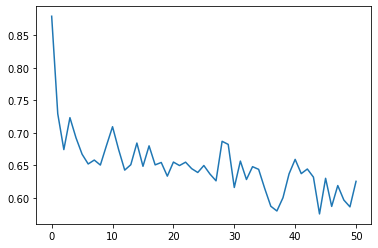

Epoch 1/100
22/22 - 2s - loss: 1.1012 - accuracy: 0.5385 - auc_51: 0.5522 - precision_51: 0.5170 - recall_51: 0.5170 - f1_score: 0.6453 - val_loss: 0.9235 - val_accuracy: 0.5526 - val_auc_51: 0.5444 - val_precision_51: 0.5600 - val_recall_51: 0.9767 - val_f1_score: 0.7227 - 2s/epoch - 82ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7274 - accuracy: 0.5222 - auc_51: 0.5431 - precision_51: 0.5000 - recall_51: 0.5387 - f1_score: 0.6466 - val_loss: 0.9609 - val_accuracy: 0.5526 - val_auc_51: 0.5317 - val_precision_51: 0.5600 - val_recall_51: 0.9767 - val_f1_score: 0.7227 - 314ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6942 - accuracy: 0.5577 - auc_51: 0.5629 - precision_51: 0.5508 - recall_51: 0.4025 - f1_score: 0.6466 - val_loss: 0.9138 - val_accuracy: 0.4868 - val_auc_51: 0.5173 - val_precision_51: 0.8333 - val_recall_51: 0.1163 - val_f1_score: 0.7227 - 313ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6978 - accuracy: 0.5547 - auc_51: 0.5727 - precision_51: 0.5846 - recall_

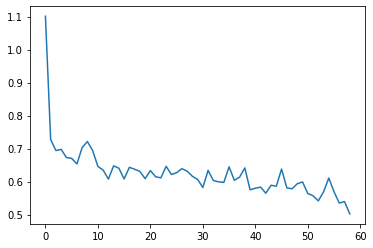

Epoch 1/100
22/22 - 2s - loss: 0.9416 - accuracy: 0.4993 - auc_52: 0.5258 - precision_52: 0.4881 - recall_52: 0.4307 - f1_score: 0.6581 - val_loss: 0.6786 - val_accuracy: 0.5600 - val_auc_52: 0.5208 - val_precision_52: 1.0000 - val_recall_52: 0.0294 - val_f1_score: 0.6239 - 2s/epoch - 83ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7880 - accuracy: 0.5391 - auc_52: 0.5468 - precision_52: 0.5485 - recall_52: 0.3404 - f1_score: 0.6581 - val_loss: 0.7004 - val_accuracy: 0.4533 - val_auc_52: 0.5147 - val_precision_52: 0.4533 - val_recall_52: 1.0000 - val_f1_score: 0.6239 - 335ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7529 - accuracy: 0.4919 - auc_52: 0.5234 - precision_52: 0.4854 - recall_52: 0.6024 - f1_score: 0.6581 - val_loss: 0.6810 - val_accuracy: 0.5600 - val_auc_52: 0.5147 - val_precision_52: 1.0000 - val_recall_52: 0.0294 - val_f1_score: 0.6239 - 316ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7508 - accuracy: 0.5096 - auc_52: 0.5353 - precision_52: 0.5000 - recall_

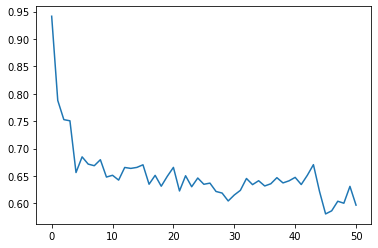

Epoch 1/100
22/22 - 2s - loss: 0.8416 - accuracy: 0.5258 - auc_53: 0.5432 - precision_53: 0.5098 - recall_53: 0.5549 - f1_score: 0.6527 - val_loss: 0.6756 - val_accuracy: 0.5200 - val_auc_53: 0.5402 - val_precision_53: 1.0000 - val_recall_53: 0.0526 - val_f1_score: 0.6726 - 2s/epoch - 96ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7184 - accuracy: 0.5465 - auc_53: 0.5801 - precision_53: 0.5561 - recall_53: 0.3171 - f1_score: 0.6527 - val_loss: 0.6748 - val_accuracy: 0.5200 - val_auc_53: 0.5541 - val_precision_53: 1.0000 - val_recall_53: 0.0526 - val_f1_score: 0.6726 - 358ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7263 - accuracy: 0.5628 - auc_53: 0.5966 - precision_53: 0.6429 - recall_53: 0.2195 - f1_score: 0.6527 - val_loss: 0.6748 - val_accuracy: 0.5067 - val_auc_53: 0.6522 - val_precision_53: 0.5067 - val_recall_53: 1.0000 - val_f1_score: 0.6726 - 354ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7094 - accuracy: 0.5510 - auc_53: 0.5817 - precision_53: 0.5968 - recall_

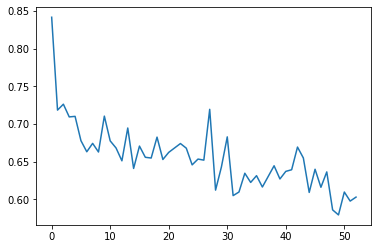

Epoch 1/100
22/22 - 2s - loss: 0.8832 - accuracy: 0.5066 - auc_54: 0.5011 - precision_54: 0.5000 - recall_54: 0.4012 - f1_score: 0.6607 - val_loss: 1.8363 - val_accuracy: 0.5600 - val_auc_54: 0.6177 - val_precision_54: 0.0000e+00 - val_recall_54: 0.0000e+00 - val_f1_score: 0.5981 - 2s/epoch - 78ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7440 - accuracy: 0.5495 - auc_54: 0.5826 - precision_54: 0.5492 - recall_54: 0.4850 - f1_score: 0.6607 - val_loss: 1.1838 - val_accuracy: 0.5467 - val_auc_54: 0.5345 - val_precision_54: 0.0000e+00 - val_recall_54: 0.0000e+00 - val_f1_score: 0.5981 - 359ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7026 - accuracy: 0.5436 - auc_54: 0.5974 - precision_54: 0.5375 - recall_54: 0.5359 - f1_score: 0.6607 - val_loss: 0.9593 - val_accuracy: 0.5600 - val_auc_54: 0.4786 - val_precision_54: 0.0000e+00 - val_recall_54: 0.0000e+00 - val_f1_score: 0.5981 - 327ms/epoch - 15ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6737 - accuracy: 0.5583 - auc_54: 0.6162 - precis

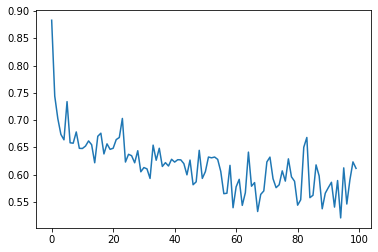

Epoch 1/100
22/22 - 2s - loss: 0.9495 - accuracy: 0.5229 - auc_55: 0.5082 - precision_55: 0.5132 - recall_55: 0.3556 - f1_score: 0.6541 - val_loss: 0.6746 - val_accuracy: 0.4933 - val_auc_55: 0.5270 - val_precision_55: 0.4933 - val_recall_55: 1.0000 - val_f1_score: 0.6607 - 2s/epoch - 77ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6966 - accuracy: 0.5303 - auc_55: 0.5800 - precision_55: 0.5156 - recall_55: 0.5532 - f1_score: 0.6541 - val_loss: 0.6737 - val_accuracy: 0.5333 - val_auc_55: 0.5270 - val_precision_55: 1.0000 - val_recall_55: 0.0541 - val_f1_score: 0.6607 - 344ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6866 - accuracy: 0.5539 - auc_55: 0.6008 - precision_55: 0.5429 - recall_55: 0.5198 - f1_score: 0.6541 - val_loss: 0.6750 - val_accuracy: 0.4933 - val_auc_55: 0.5270 - val_precision_55: 0.4933 - val_recall_55: 1.0000 - val_f1_score: 0.6607 - 356ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6900 - accuracy: 0.5761 - auc_55: 0.6058 - precision_55: 0.6750 - recall_

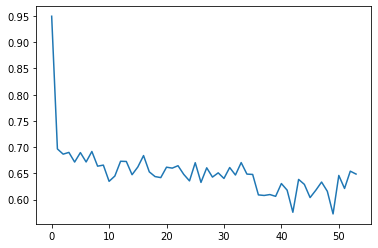

Epoch 1/100
22/22 - 2s - loss: 0.9369 - accuracy: 0.5421 - auc_56: 0.5453 - precision_56: 0.5346 - recall_56: 0.5120 - f1_score: 0.6581 - val_loss: 0.7186 - val_accuracy: 0.4667 - val_auc_56: 0.5179 - val_precision_56: 0.4595 - val_recall_56: 1.0000 - val_f1_score: 0.6239 - 2s/epoch - 78ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7208 - accuracy: 0.5052 - auc_56: 0.5496 - precision_56: 0.4964 - recall_56: 0.6205 - f1_score: 0.6581 - val_loss: 0.6917 - val_accuracy: 0.5600 - val_auc_56: 0.5179 - val_precision_56: 0.6667 - val_recall_56: 0.0588 - val_f1_score: 0.6239 - 322ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7367 - accuracy: 0.5421 - auc_56: 0.5607 - precision_56: 0.5340 - recall_56: 0.5211 - f1_score: 0.6581 - val_loss: 0.6753 - val_accuracy: 0.5600 - val_auc_56: 0.5179 - val_precision_56: 0.6667 - val_recall_56: 0.0588 - val_f1_score: 0.6239 - 330ms/epoch - 15ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6924 - accuracy: 0.5436 - auc_56: 0.5879 - precision_56: 0.5507 - recall_

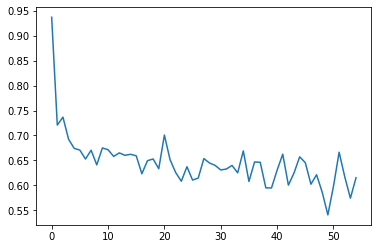

Epoch 1/100
22/22 - 2s - loss: 0.8612 - accuracy: 0.5126 - auc_57: 0.5129 - precision_57: 0.5021 - recall_57: 0.3625 - f1_score: 0.6567 - val_loss: 0.8108 - val_accuracy: 0.5200 - val_auc_57: 0.5004 - val_precision_57: 0.0000e+00 - val_recall_57: 0.0000e+00 - val_f1_score: 0.6364 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7374 - accuracy: 0.5406 - auc_57: 0.5773 - precision_57: 0.5248 - recall_57: 0.6405 - f1_score: 0.6567 - val_loss: 0.7997 - val_accuracy: 0.4667 - val_auc_57: 0.5014 - val_precision_57: 0.4667 - val_recall_57: 1.0000 - val_f1_score: 0.6364 - 309ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7064 - accuracy: 0.5480 - auc_57: 0.5443 - precision_57: 0.5413 - recall_57: 0.4955 - f1_score: 0.6567 - val_loss: 0.7178 - val_accuracy: 0.5200 - val_auc_57: 0.4875 - val_precision_57: 0.0000e+00 - val_recall_57: 0.0000e+00 - val_f1_score: 0.6364 - 346ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7000 - accuracy: 0.5303 - auc_57: 0.5770 - precision_57: 

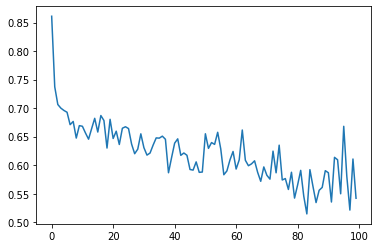

Epoch 1/100
22/22 - 2s - loss: 1.1136 - accuracy: 0.5303 - auc_58: 0.5219 - precision_58: 0.5116 - recall_58: 0.4769 - f1_score: 0.6487 - val_loss: 0.8083 - val_accuracy: 0.4533 - val_auc_58: 0.5179 - val_precision_58: 0.5000 - val_recall_58: 0.0488 - val_f1_score: 0.7069 - 2s/epoch - 80ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7115 - accuracy: 0.5451 - auc_58: 0.5500 - precision_58: 0.5339 - recall_58: 0.4123 - f1_score: 0.6487 - val_loss: 0.6857 - val_accuracy: 0.4800 - val_auc_58: 0.5294 - val_precision_58: 1.0000 - val_recall_58: 0.0488 - val_f1_score: 0.7069 - 309ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6942 - accuracy: 0.5436 - auc_58: 0.5840 - precision_58: 0.5292 - recall_58: 0.4462 - f1_score: 0.6487 - val_loss: 0.6541 - val_accuracy: 0.5067 - val_auc_58: 0.5753 - val_precision_58: 1.0000 - val_recall_58: 0.0976 - val_f1_score: 0.7069 - 330ms/epoch - 15ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6716 - accuracy: 0.5775 - auc_58: 0.6181 - precision_58: 0.6423 - recall_

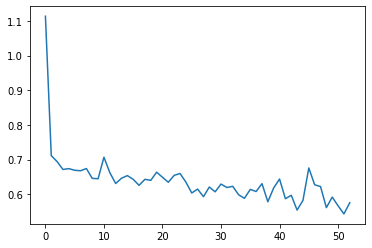

Epoch 1/100
22/22 - 2s - loss: 0.8436 - accuracy: 0.5347 - auc_59: 0.5284 - precision_59: 0.5262 - recall_59: 0.6000 - f1_score: 0.6621 - val_loss: 0.6914 - val_accuracy: 0.5867 - val_auc_59: 0.5000 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00 - val_f1_score: 0.5849 - 2s/epoch - 81ms/step
Epoch 2/100
22/22 - 0s - loss: 0.7619 - accuracy: 0.5199 - auc_59: 0.5396 - precision_59: 0.5130 - recall_59: 0.5910 - f1_score: 0.6621 - val_loss: 0.6853 - val_accuracy: 0.5867 - val_auc_59: 0.5000 - val_precision_59: 0.0000e+00 - val_recall_59: 0.0000e+00 - val_f1_score: 0.5849 - 344ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.7116 - accuracy: 0.5258 - auc_59: 0.5559 - precision_59: 0.5185 - recall_59: 0.5851 - f1_score: 0.6621 - val_loss: 0.7090 - val_accuracy: 0.4133 - val_auc_59: 0.5700 - val_precision_59: 0.4133 - val_recall_59: 1.0000 - val_f1_score: 0.5849 - 347ms/epoch - 16ms/step
Epoch 4/100
22/22 - 0s - loss: 0.7050 - accuracy: 0.5391 - auc_59: 0.5608 - precision_59: 

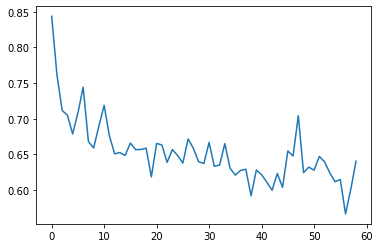

In [44]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_earlyfusion_model = RCNN(n_features, None, n_length, n_outputs)
    history = rcnn_binary_earlyfusion_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_earlyfusion_model.save(model_path / 'early_binary_rcnn.h5')

#### Training performance

In [45]:
early_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
early_rcnn_train_results

{'Accuracy': 0.6258963227272034,
 'ROC/AUC': 0.6934687972068787,
 'Precision': 0.7173330068588257,
 'Recall': 0.4328054517507553,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [46]:
early_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
early_rcnn_val_results

{'Accuracy': 0.5267368376255035,
 'ROC/AUC': 0.5530449271202087,
 'Precision': 0.5166666686534882,
 'Recall': 0.04087609741836786,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [47]:
rcnn_binary_earlyfusion_model = load_model(model_path / 'early_binary_rcnn.h5')
y_pred = rcnn_binary_earlyfusion_model.predict(X_test)
_, acc, auc, precision, recall, f1 = rcnn_binary_earlyfusion_model.evaluate(X_test, y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 9ms/step - loss: 0.7031 - accuracy: 0.8619 - auc_51: 0.4953 - precision_51: 0.8647 - recall_51: 0.9957 - f1_score: 0.9259
Accuracy: 86.19% 
ROC/AUC: 0.50 
Precision: 0.86 
Recall: 1.00 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

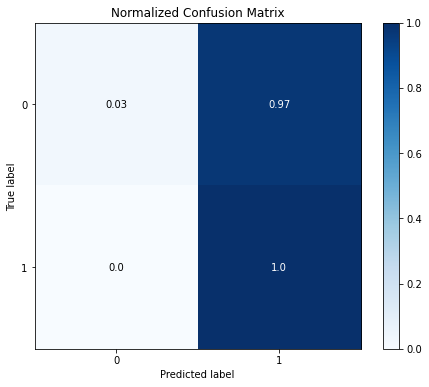

In [48]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

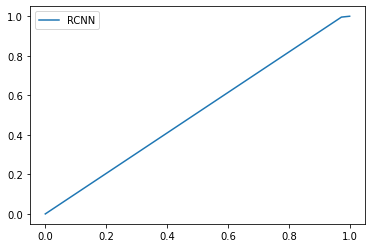

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

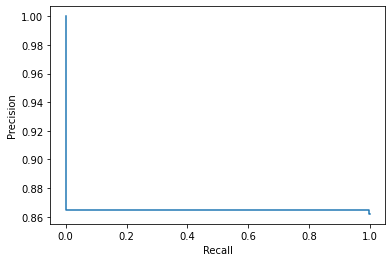

In [50]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## 4. Multimodal Late Fusion

In [51]:
body_X_train, body_X_test, body_y_train, body_y_test = load_dataset('skeleton', binary=True, fusion=True)
body_X = body_X_train.copy()
body_y = body_y_train.copy()

print(body_X_train.shape, body_y_train.shape)
print(body_X_test.shape, body_y_test.shape)

(752, 1, 350, 35) (752, 1)
(268, 1, 350, 35) (268, 1)


In [52]:
face_X_train, face_X_test, face_y_train, face_y_test = load_dataset('AUs', binary=True)
face_X = face_X_train.copy()
face_y = face_y_train.copy()

print(face_X_train.shape, face_y_train.shape)
print(face_X_test.shape, face_y_test.shape)

(752, 1, 350, 25) (752, 1)
(268, 1, 350, 25) (268, 1)


In [53]:
n_length, body_features, face_features, n_outputs = face_X_train.shape[2], body_X_train.shape[-1], face_X_train.shape[-1], body_y_train.shape[1]

### 4.1 CNN + BiLSTM (Concatenation)

Epoch 1/100
22/22 - 5s - loss: 0.7303 - accuracy: 0.5932 - auc_60: 0.5971 - precision_60: 0.5880 - recall_60: 0.5138 - f1_score: 0.6494 - val_loss: 0.6801 - val_accuracy: 0.5526 - val_auc_60: 0.6157 - val_precision_60: 0.5467 - val_recall_60: 1.0000 - val_f1_score: 0.7009 - 5s/epoch - 246ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6227 - accuracy: 0.6612 - auc_60: 0.7110 - precision_60: 0.6558 - recall_60: 0.6215 - f1_score: 0.6494 - val_loss: 0.6576 - val_accuracy: 0.6053 - val_auc_60: 0.6756 - val_precision_60: 0.5846 - val_recall_60: 0.9268 - val_f1_score: 0.7009 - 843ms/epoch - 38ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5773 - accuracy: 0.7130 - auc_60: 0.7692 - precision_60: 0.6979 - recall_60: 0.7108 - f1_score: 0.6494 - val_loss: 0.6860 - val_accuracy: 0.6447 - val_auc_60: 0.7007 - val_precision_60: 0.7692 - val_recall_60: 0.4878 - val_f1_score: 0.7009 - 783ms/epoch - 36ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5291 - accuracy: 0.7456 - auc_60: 0.8101 - precision_60: 0.7444 - recall

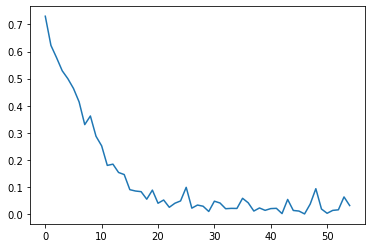

Epoch 1/100
22/22 - 5s - loss: 0.7139 - accuracy: 0.6021 - auc_61: 0.6165 - precision_61: 0.5918 - recall_61: 0.5387 - f1_score: 0.6466 - val_loss: 0.7728 - val_accuracy: 0.4342 - val_auc_61: 0.7600 - val_precision_61: 0.0000e+00 - val_recall_61: 0.0000e+00 - val_f1_score: 0.7227 - 5s/epoch - 234ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6232 - accuracy: 0.6775 - auc_61: 0.7120 - precision_61: 0.7092 - recall_61: 0.5511 - f1_score: 0.6466 - val_loss: 0.6633 - val_accuracy: 0.6447 - val_auc_61: 0.7188 - val_precision_61: 0.6667 - val_recall_61: 0.7442 - val_f1_score: 0.7227 - 849ms/epoch - 39ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5749 - accuracy: 0.7012 - auc_61: 0.7675 - precision_61: 0.6933 - recall_61: 0.6718 - f1_score: 0.6466 - val_loss: 0.6538 - val_accuracy: 0.6842 - val_auc_61: 0.7001 - val_precision_61: 0.6610 - val_recall_61: 0.9070 - val_f1_score: 0.7227 - 877ms/epoch - 40ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5071 - accuracy: 0.7530 - auc_61: 0.8305 - precision_61: 0.7378 

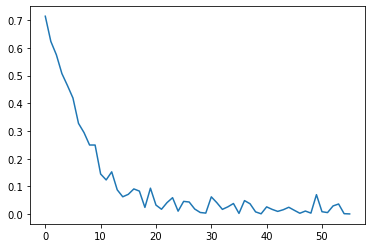

Epoch 1/100
22/22 - 5s - loss: 0.7175 - accuracy: 0.5923 - auc_62: 0.6159 - precision_62: 0.5875 - recall_62: 0.5663 - f1_score: 0.6581 - val_loss: 0.6779 - val_accuracy: 0.6000 - val_auc_62: 0.6198 - val_precision_62: 1.0000 - val_recall_62: 0.1176 - val_f1_score: 0.6239 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6238 - accuracy: 0.6499 - auc_62: 0.7166 - precision_62: 0.6385 - recall_62: 0.6596 - f1_score: 0.6581 - val_loss: 0.7940 - val_accuracy: 0.5467 - val_auc_62: 0.5316 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00 - val_f1_score: 0.6239 - 740ms/epoch - 34ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5797 - accuracy: 0.7120 - auc_62: 0.7660 - precision_62: 0.7134 - recall_62: 0.6898 - f1_score: 0.6581 - val_loss: 0.7032 - val_accuracy: 0.5467 - val_auc_62: 0.7059 - val_precision_62: 0.0000e+00 - val_recall_62: 0.0000e+00 - val_f1_score: 0.6239 - 742ms/epoch - 34ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5521 - accuracy: 0.7371 - auc_62: 0.7915 - precision_62:

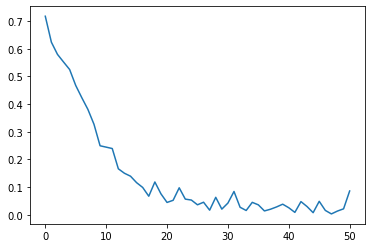

Epoch 1/100
22/22 - 5s - loss: 0.6973 - accuracy: 0.5997 - auc_63: 0.6383 - precision_63: 0.5893 - recall_63: 0.5732 - f1_score: 0.6527 - val_loss: 0.7433 - val_accuracy: 0.5867 - val_auc_63: 0.6266 - val_precision_63: 0.7059 - val_recall_63: 0.3158 - val_f1_score: 0.6726 - 5s/epoch - 242ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6104 - accuracy: 0.6736 - auc_63: 0.7297 - precision_63: 0.6667 - recall_63: 0.6524 - f1_score: 0.6527 - val_loss: 0.6546 - val_accuracy: 0.6133 - val_auc_63: 0.6522 - val_precision_63: 0.6098 - val_recall_63: 0.6579 - val_f1_score: 0.6726 - 855ms/epoch - 39ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5623 - accuracy: 0.6987 - auc_63: 0.7818 - precision_63: 0.6867 - recall_63: 0.6951 - f1_score: 0.6527 - val_loss: 0.6884 - val_accuracy: 0.5600 - val_auc_63: 0.7048 - val_precision_63: 0.5362 - val_recall_63: 0.9737 - val_f1_score: 0.6726 - 752ms/epoch - 34ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5219 - accuracy: 0.7371 - auc_63: 0.8175 - precision_63: 0.7344 - recall

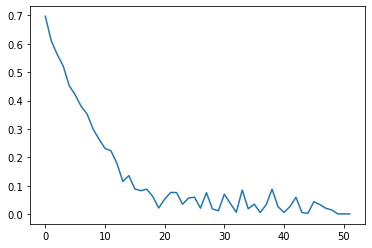

Epoch 1/100
22/22 - 5s - loss: 0.6999 - accuracy: 0.6012 - auc_64: 0.6218 - precision_64: 0.5982 - recall_64: 0.5838 - f1_score: 0.6607 - val_loss: 0.6984 - val_accuracy: 0.5867 - val_auc_64: 0.5549 - val_precision_64: 1.0000 - val_recall_64: 0.0312 - val_f1_score: 0.5981 - 5s/epoch - 230ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6058 - accuracy: 0.6765 - auc_64: 0.7332 - precision_64: 0.6861 - recall_64: 0.6347 - f1_score: 0.6607 - val_loss: 0.6918 - val_accuracy: 0.5333 - val_auc_64: 0.5640 - val_precision_64: 0.4615 - val_recall_64: 0.5625 - val_f1_score: 0.5981 - 839ms/epoch - 38ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5819 - accuracy: 0.7001 - auc_64: 0.7601 - precision_64: 0.6991 - recall_64: 0.6886 - f1_score: 0.6607 - val_loss: 0.6421 - val_accuracy: 0.5867 - val_auc_64: 0.7674 - val_precision_64: 1.0000 - val_recall_64: 0.0312 - val_f1_score: 0.5981 - 849ms/epoch - 39ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5266 - accuracy: 0.7430 - auc_64: 0.8155 - precision_64: 0.7667 - recall

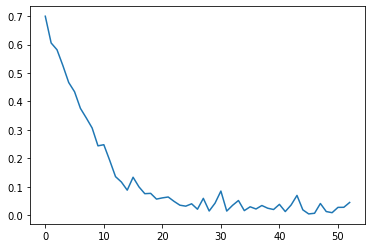

Epoch 1/100
22/22 - 5s - loss: 0.7457 - accuracy: 0.5805 - auc_65: 0.5921 - precision_65: 0.5719 - recall_65: 0.5441 - f1_score: 0.6541 - val_loss: 0.6914 - val_accuracy: 0.4933 - val_auc_65: 0.6472 - val_precision_65: 0.4933 - val_recall_65: 1.0000 - val_f1_score: 0.6607 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6187 - accuracy: 0.6588 - auc_65: 0.7179 - precision_65: 0.6467 - recall_65: 0.6565 - f1_score: 0.6541 - val_loss: 0.5932 - val_accuracy: 0.7333 - val_auc_65: 0.7831 - val_precision_65: 0.6809 - val_recall_65: 0.8649 - val_f1_score: 0.6607 - 874ms/epoch - 40ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5775 - accuracy: 0.6883 - auc_65: 0.7625 - precision_65: 0.6844 - recall_65: 0.6657 - f1_score: 0.6541 - val_loss: 0.6491 - val_accuracy: 0.6133 - val_auc_65: 0.7329 - val_precision_65: 0.7857 - val_recall_65: 0.2973 - val_f1_score: 0.6607 - 721ms/epoch - 33ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5221 - accuracy: 0.7400 - auc_65: 0.8152 - precision_65: 0.7368 - recall

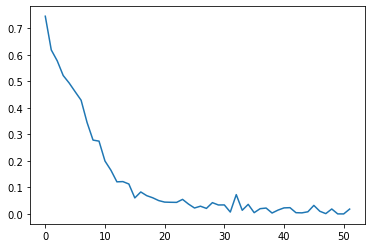

Epoch 1/100
22/22 - 5s - loss: 0.7189 - accuracy: 0.6027 - auc_66: 0.6125 - precision_66: 0.6006 - recall_66: 0.5663 - f1_score: 0.6581 - val_loss: 0.6784 - val_accuracy: 0.5467 - val_auc_66: 0.6779 - val_precision_66: 0.5000 - val_recall_66: 0.0588 - val_f1_score: 0.6239 - 5s/epoch - 231ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6294 - accuracy: 0.6484 - auc_66: 0.7056 - precision_66: 0.6536 - recall_66: 0.6024 - f1_score: 0.6581 - val_loss: 0.6918 - val_accuracy: 0.5333 - val_auc_66: 0.6080 - val_precision_66: 0.4912 - val_recall_66: 0.8235 - val_f1_score: 0.6239 - 731ms/epoch - 33ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5885 - accuracy: 0.6809 - auc_66: 0.7525 - precision_66: 0.6847 - recall_66: 0.6476 - f1_score: 0.6581 - val_loss: 0.6687 - val_accuracy: 0.6133 - val_auc_66: 0.6388 - val_precision_66: 0.6471 - val_recall_66: 0.3235 - val_f1_score: 0.6239 - 843ms/epoch - 38ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5443 - accuracy: 0.7371 - auc_66: 0.7977 - precision_66: 0.7452 - recall

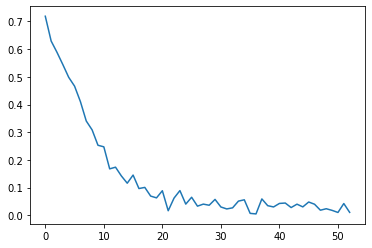

Epoch 1/100
22/22 - 5s - loss: 0.7269 - accuracy: 0.5923 - auc_67: 0.6110 - precision_67: 0.5908 - recall_67: 0.5408 - f1_score: 0.6567 - val_loss: 0.6832 - val_accuracy: 0.6000 - val_auc_67: 0.5804 - val_precision_67: 0.5714 - val_recall_67: 0.5714 - val_f1_score: 0.6364 - 5s/epoch - 249ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5744 - accuracy: 0.7179 - auc_67: 0.7690 - precision_67: 0.7303 - recall_67: 0.6707 - f1_score: 0.6567 - val_loss: 0.6644 - val_accuracy: 0.6133 - val_auc_67: 0.7032 - val_precision_67: 0.5682 - val_recall_67: 0.7143 - val_f1_score: 0.6364 - 850ms/epoch - 39ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5542 - accuracy: 0.7297 - auc_67: 0.7913 - precision_67: 0.7229 - recall_67: 0.7251 - f1_score: 0.6567 - val_loss: 0.9602 - val_accuracy: 0.4667 - val_auc_67: 0.5754 - val_precision_67: 0.4667 - val_recall_67: 1.0000 - val_f1_score: 0.6364 - 758ms/epoch - 34ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5363 - accuracy: 0.7238 - auc_67: 0.8029 - precision_67: 0.7169 - recall

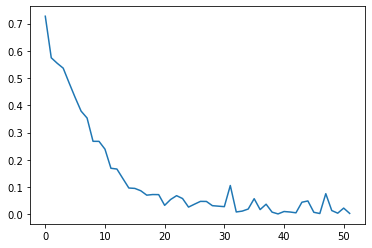

Epoch 1/100
22/22 - 5s - loss: 0.6893 - accuracy: 0.6056 - auc_68: 0.6447 - precision_68: 0.6007 - recall_68: 0.5323 - f1_score: 0.6487 - val_loss: 0.6691 - val_accuracy: 0.6267 - val_auc_68: 0.6517 - val_precision_68: 0.6140 - val_recall_68: 0.8537 - val_f1_score: 0.7069 - 5s/epoch - 244ms/step
Epoch 2/100
22/22 - 1s - loss: 0.5842 - accuracy: 0.6736 - auc_68: 0.7592 - precision_68: 0.6667 - recall_68: 0.6400 - f1_score: 0.6487 - val_loss: 0.7663 - val_accuracy: 0.5333 - val_auc_68: 0.6241 - val_precision_68: 0.5429 - val_recall_68: 0.9268 - val_f1_score: 0.7069 - 760ms/epoch - 35ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5601 - accuracy: 0.7238 - auc_68: 0.7856 - precision_68: 0.7066 - recall_68: 0.7262 - f1_score: 0.6487 - val_loss: 0.7552 - val_accuracy: 0.5867 - val_auc_68: 0.6381 - val_precision_68: 0.6562 - val_recall_68: 0.5122 - val_f1_score: 0.7069 - 756ms/epoch - 34ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5195 - accuracy: 0.7445 - auc_68: 0.8211 - precision_68: 0.7390 - recall

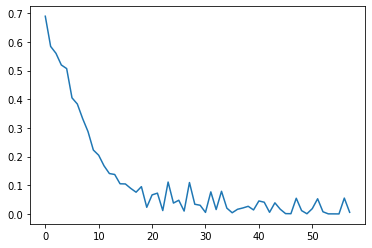

Epoch 1/100
22/22 - 5s - loss: 0.7345 - accuracy: 0.5746 - auc_69: 0.6050 - precision_69: 0.5644 - recall_69: 0.6149 - f1_score: 0.6621 - val_loss: 0.6909 - val_accuracy: 0.5867 - val_auc_69: 0.6155 - val_precision_69: 0.5000 - val_recall_69: 0.8387 - val_f1_score: 0.5849 - 5s/epoch - 233ms/step
Epoch 2/100
22/22 - 1s - loss: 0.6175 - accuracy: 0.6544 - auc_69: 0.7164 - precision_69: 0.6499 - recall_69: 0.6537 - f1_score: 0.6621 - val_loss: 0.6728 - val_accuracy: 0.5600 - val_auc_69: 0.6815 - val_precision_69: 0.2500 - val_recall_69: 0.0323 - val_f1_score: 0.5849 - 858ms/epoch - 39ms/step
Epoch 3/100
22/22 - 1s - loss: 0.5827 - accuracy: 0.6898 - auc_69: 0.7588 - precision_69: 0.6935 - recall_69: 0.6687 - f1_score: 0.6621 - val_loss: 0.7837 - val_accuracy: 0.5867 - val_auc_69: 0.6485 - val_precision_69: 0.0000e+00 - val_recall_69: 0.0000e+00 - val_f1_score: 0.5849 - 729ms/epoch - 33ms/step
Epoch 4/100
22/22 - 1s - loss: 0.5373 - accuracy: 0.7105 - auc_69: 0.8009 - precision_69: 0.7192 

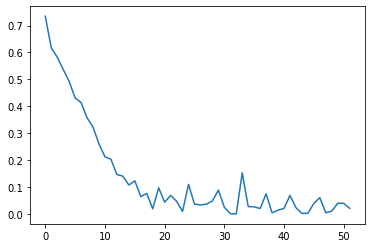

In [54]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    cnnlstm_binary_latefusion_model = CNNLSTM(body_features, face_features, n_length, n_outputs, fusion=True)
    history = cnnlstm_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        cnnlstm_binary_latefusion_model.save(model_path / 'late_binary_cnnlstm.h5')

#### Training performance

In [55]:
late_cnnlstm_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
late_cnnlstm_train_results

{'Accuracy': 0.9942381978034973,
 'ROC/AUC': 0.9989105880260467,
 'Precision': 0.9940038800239563,
 'Recall': 0.9942627727985383,
 'F1-score': 0.6547199666500092}

#### Validation performance

In [56]:
late_cnnlstm_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
late_cnnlstm_val_results

{'Accuracy': 0.6594385862350464,
 'ROC/AUC': 0.712938916683197,
 'Precision': 0.6292243540287018,
 'Recall': 0.7329765915870666,
 'F1-score': 0.6530827581882477}

#### Performance and predictions on test set

In [57]:
cnnlstm_binary_latefusion_model = load_model(model_path / 'late_binary_cnnlstm.h5')
y_pred = cnnlstm_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = cnnlstm_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
cnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 1s 14ms/step - loss: 0.8448 - accuracy: 0.5149 - auc_68: 0.6463 - precision_68: 0.9316 - recall_68: 0.4719 - f1_score: 0.9259
Accuracy: 51.49% 
ROC/AUC: 0.65 
Precision: 0.93 
Recall: 0.47 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

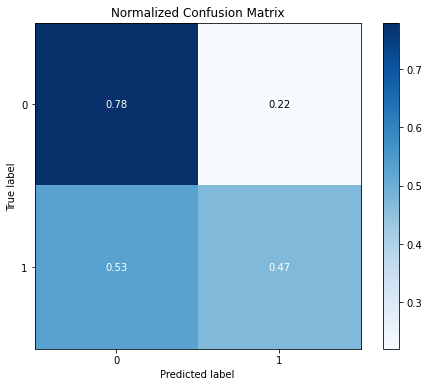

In [58]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

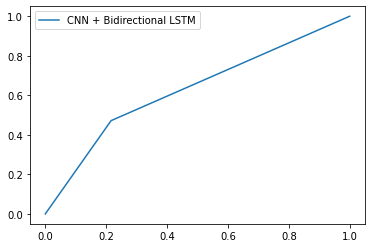

In [59]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='CNN + Bidirectional LSTM')
plt.legend()
plt.show()

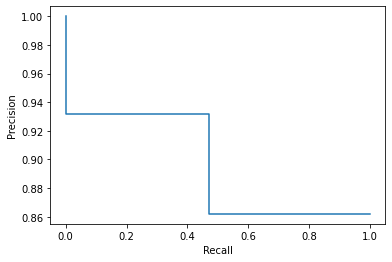

In [60]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 4.2 RCNN (Concatenation)

Epoch 1/100
22/22 - 2s - loss: 0.7264 - accuracy: 0.5902 - auc_70: 0.6104 - precision_70: 0.5764 - recall_70: 0.5569 - f1_score: 0.6494 - val_loss: 0.8696 - val_accuracy: 0.5395 - val_auc_70: 0.6686 - val_precision_70: 0.5405 - val_recall_70: 0.9756 - val_f1_score: 0.7009 - 2s/epoch - 96ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6057 - accuracy: 0.6760 - auc_70: 0.7304 - precision_70: 0.6879 - recall_70: 0.5969 - f1_score: 0.6494 - val_loss: 2.0806 - val_accuracy: 0.5395 - val_auc_70: 0.6533 - val_precision_70: 0.5395 - val_recall_70: 1.0000 - val_f1_score: 0.7009 - 325ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5862 - accuracy: 0.6849 - auc_70: 0.7585 - precision_70: 0.7014 - recall_70: 0.6000 - f1_score: 0.6494 - val_loss: 2.1894 - val_accuracy: 0.5395 - val_auc_70: 0.6582 - val_precision_70: 0.5395 - val_recall_70: 1.0000 - val_f1_score: 0.7009 - 276ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5911 - accuracy: 0.6672 - auc_70: 0.7468 - precision_70: 0.6623 - recall_

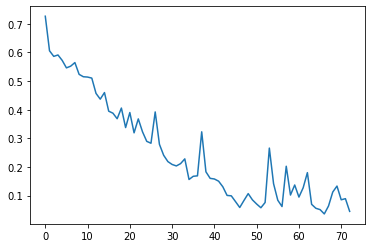

Epoch 1/100
22/22 - 2s - loss: 0.7103 - accuracy: 0.6228 - auc_71: 0.6521 - precision_71: 0.6141 - recall_71: 0.5666 - f1_score: 0.6466 - val_loss: 2.0524 - val_accuracy: 0.5658 - val_auc_71: 0.5980 - val_precision_71: 0.5658 - val_recall_71: 1.0000 - val_f1_score: 0.7227 - 2s/epoch - 78ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6197 - accuracy: 0.6627 - auc_71: 0.7171 - precision_71: 0.6578 - recall_71: 0.6130 - f1_score: 0.6466 - val_loss: 1.5997 - val_accuracy: 0.5658 - val_auc_71: 0.6600 - val_precision_71: 0.5658 - val_recall_71: 1.0000 - val_f1_score: 0.7227 - 308ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6068 - accuracy: 0.6612 - auc_71: 0.7399 - precision_71: 0.6536 - recall_71: 0.6192 - f1_score: 0.6466 - val_loss: 0.9967 - val_accuracy: 0.5658 - val_auc_71: 0.6314 - val_precision_71: 0.8571 - val_recall_71: 0.2791 - val_f1_score: 0.7227 - 327ms/epoch - 15ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6317 - accuracy: 0.6598 - auc_71: 0.7141 - precision_71: 0.6824 - recall_

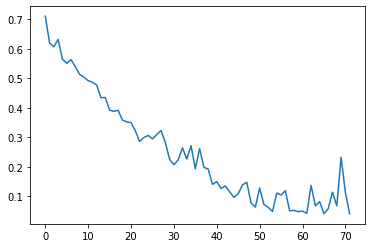

Epoch 1/100
22/22 - 2s - loss: 0.6967 - accuracy: 0.6233 - auc_72: 0.6460 - precision_72: 0.6351 - recall_72: 0.5452 - f1_score: 0.6581 - val_loss: 7.8653 - val_accuracy: 0.4533 - val_auc_72: 0.5000 - val_precision_72: 0.4533 - val_recall_72: 1.0000 - val_f1_score: 0.6239 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6443 - accuracy: 0.6425 - auc_72: 0.7001 - precision_72: 0.6278 - recall_72: 0.6657 - f1_score: 0.6581 - val_loss: 0.7194 - val_accuracy: 0.7200 - val_auc_72: 0.7428 - val_precision_72: 0.6512 - val_recall_72: 0.8235 - val_f1_score: 0.6239 - 301ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6278 - accuracy: 0.6603 - auc_72: 0.7102 - precision_72: 0.6656 - recall_72: 0.6175 - f1_score: 0.6581 - val_loss: 3.3052 - val_accuracy: 0.4533 - val_auc_72: 0.6302 - val_precision_72: 0.4533 - val_recall_72: 1.0000 - val_f1_score: 0.6239 - 290ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5955 - accuracy: 0.6913 - auc_72: 0.7452 - precision_72: 0.6965 - recall_

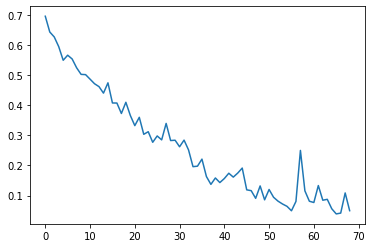

Epoch 1/100
22/22 - 2s - loss: 0.7983 - accuracy: 0.5657 - auc_73: 0.5896 - precision_73: 0.5500 - recall_73: 0.5701 - f1_score: 0.6527 - val_loss: 3.4828 - val_accuracy: 0.5067 - val_auc_73: 0.5139 - val_precision_73: 0.5067 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6099 - accuracy: 0.6691 - auc_73: 0.7273 - precision_73: 0.6912 - recall_73: 0.5732 - f1_score: 0.6527 - val_loss: 3.1137 - val_accuracy: 0.5067 - val_auc_73: 0.5622 - val_precision_73: 0.5067 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 299ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6146 - accuracy: 0.6795 - auc_73: 0.7294 - precision_73: 0.6920 - recall_73: 0.6098 - f1_score: 0.6527 - val_loss: 1.2789 - val_accuracy: 0.5333 - val_auc_73: 0.6767 - val_precision_73: 0.5205 - val_recall_73: 1.0000 - val_f1_score: 0.6726 - 295ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5944 - accuracy: 0.7001 - auc_73: 0.7524 - precision_73: 0.7063 - recall_

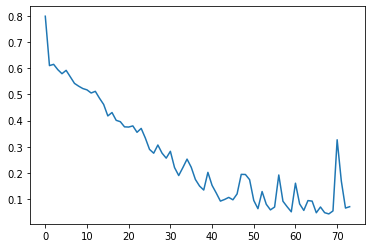

Epoch 1/100
22/22 - 2s - loss: 0.7026 - accuracy: 0.6263 - auc_74: 0.6478 - precision_74: 0.6262 - recall_74: 0.6018 - f1_score: 0.6607 - val_loss: 6.4019 - val_accuracy: 0.4267 - val_auc_74: 0.5000 - val_precision_74: 0.4267 - val_recall_74: 1.0000 - val_f1_score: 0.5981 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6307 - accuracy: 0.6588 - auc_74: 0.7050 - precision_74: 0.6722 - recall_74: 0.6018 - f1_score: 0.6607 - val_loss: 2.8344 - val_accuracy: 0.4267 - val_auc_74: 0.6148 - val_precision_74: 0.4267 - val_recall_74: 1.0000 - val_f1_score: 0.5981 - 299ms/epoch - 14ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5984 - accuracy: 0.6913 - auc_74: 0.7497 - precision_74: 0.6959 - recall_74: 0.6647 - f1_score: 0.6607 - val_loss: 3.1485 - val_accuracy: 0.4267 - val_auc_74: 0.5945 - val_precision_74: 0.4267 - val_recall_74: 1.0000 - val_f1_score: 0.5981 - 300ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5829 - accuracy: 0.6869 - auc_74: 0.7570 - precision_74: 0.6906 - recall_

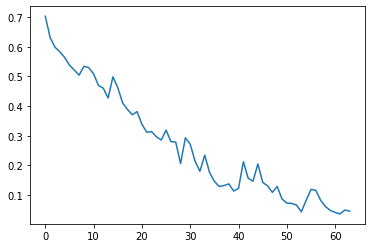

Epoch 1/100
22/22 - 2s - loss: 0.7843 - accuracy: 0.5569 - auc_75: 0.5971 - precision_75: 0.5498 - recall_75: 0.4863 - f1_score: 0.6541 - val_loss: 2.2410 - val_accuracy: 0.5067 - val_auc_75: 0.4968 - val_precision_75: 0.0000e+00 - val_recall_75: 0.0000e+00 - val_f1_score: 0.6607 - 2s/epoch - 92ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6571 - accuracy: 0.6145 - auc_75: 0.6660 - precision_75: 0.6111 - recall_75: 0.5684 - f1_score: 0.6541 - val_loss: 2.8113 - val_accuracy: 0.4933 - val_auc_75: 0.6181 - val_precision_75: 0.4933 - val_recall_75: 1.0000 - val_f1_score: 0.6607 - 286ms/epoch - 13ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6078 - accuracy: 0.6780 - auc_75: 0.7352 - precision_75: 0.6667 - recall_75: 0.6748 - f1_score: 0.6541 - val_loss: 1.9650 - val_accuracy: 0.4933 - val_auc_75: 0.7749 - val_precision_75: 0.4933 - val_recall_75: 1.0000 - val_f1_score: 0.6607 - 282ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5708 - accuracy: 0.7001 - auc_75: 0.7724 - precision_75: 0.7299 -

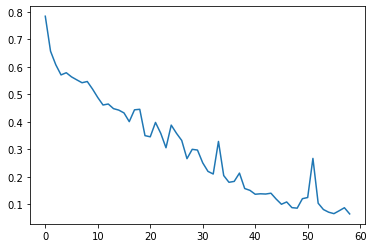

Epoch 1/100
22/22 - 2s - loss: 0.7133 - accuracy: 0.5554 - auc_76: 0.6094 - precision_76: 0.5512 - recall_76: 0.5030 - f1_score: 0.6581 - val_loss: 9.4970 - val_accuracy: 0.4533 - val_auc_76: 0.5000 - val_precision_76: 0.4533 - val_recall_76: 1.0000 - val_f1_score: 0.6239 - 2s/epoch - 78ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6248 - accuracy: 0.6632 - auc_76: 0.7180 - precision_76: 0.6699 - recall_76: 0.6175 - f1_score: 0.6581 - val_loss: 5.5411 - val_accuracy: 0.4533 - val_auc_76: 0.4828 - val_precision_76: 0.4533 - val_recall_76: 1.0000 - val_f1_score: 0.6239 - 322ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5919 - accuracy: 0.6809 - auc_76: 0.7536 - precision_76: 0.7071 - recall_76: 0.5964 - f1_score: 0.6581 - val_loss: 2.8082 - val_accuracy: 0.4533 - val_auc_76: 0.6790 - val_precision_76: 0.4533 - val_recall_76: 1.0000 - val_f1_score: 0.6239 - 303ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.6045 - accuracy: 0.6736 - auc_76: 0.7364 - precision_76: 0.6657 - recall_

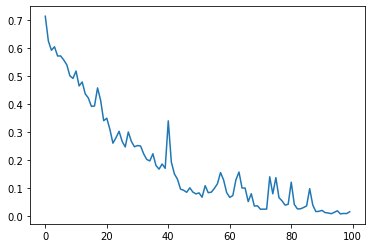

Epoch 1/100
22/22 - 2s - loss: 0.7044 - accuracy: 0.6071 - auc_77: 0.6450 - precision_77: 0.6019 - recall_77: 0.5801 - f1_score: 0.6567 - val_loss: 2.0561 - val_accuracy: 0.4667 - val_auc_77: 0.6604 - val_precision_77: 0.4667 - val_recall_77: 1.0000 - val_f1_score: 0.6364 - 2s/epoch - 81ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6230 - accuracy: 0.6632 - auc_77: 0.7196 - precision_77: 0.6820 - recall_77: 0.5831 - f1_score: 0.6567 - val_loss: 2.7253 - val_accuracy: 0.4667 - val_auc_77: 0.7032 - val_precision_77: 0.4667 - val_recall_77: 1.0000 - val_f1_score: 0.6364 - 345ms/epoch - 16ms/step
Epoch 3/100
22/22 - 0s - loss: 0.5769 - accuracy: 0.6839 - auc_77: 0.7623 - precision_77: 0.6997 - recall_77: 0.6193 - f1_score: 0.6567 - val_loss: 2.7387 - val_accuracy: 0.4667 - val_auc_77: 0.6564 - val_precision_77: 0.4667 - val_recall_77: 1.0000 - val_f1_score: 0.6364 - 295ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5813 - accuracy: 0.6913 - auc_77: 0.7651 - precision_77: 0.6906 - recall_

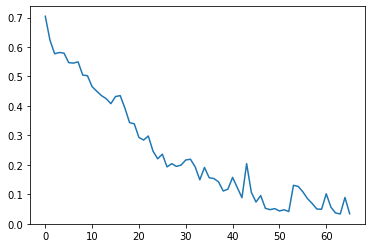

Epoch 1/100
22/22 - 2s - loss: 0.7397 - accuracy: 0.5879 - auc_78: 0.6089 - precision_78: 0.5747 - recall_78: 0.5446 - f1_score: 0.6487 - val_loss: 1.9773 - val_accuracy: 0.5467 - val_auc_78: 0.7156 - val_precision_78: 0.5467 - val_recall_78: 1.0000 - val_f1_score: 0.7069 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.6185 - accuracy: 0.6691 - auc_78: 0.7100 - precision_78: 0.6712 - recall_78: 0.6092 - f1_score: 0.6487 - val_loss: 3.3772 - val_accuracy: 0.5467 - val_auc_78: 0.5294 - val_precision_78: 0.5467 - val_recall_78: 1.0000 - val_f1_score: 0.7069 - 335ms/epoch - 15ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6040 - accuracy: 0.6706 - auc_78: 0.7375 - precision_78: 0.6518 - recall_78: 0.6738 - f1_score: 0.6487 - val_loss: 0.7223 - val_accuracy: 0.6533 - val_auc_78: 0.6933 - val_precision_78: 0.7586 - val_recall_78: 0.5366 - val_f1_score: 0.7069 - 298ms/epoch - 14ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5936 - accuracy: 0.7075 - auc_78: 0.7511 - precision_78: 0.7361 - recall_

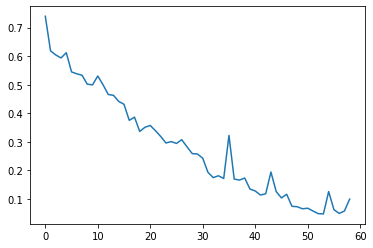

Epoch 1/100
22/22 - 2s - loss: 0.6793 - accuracy: 0.6352 - auc_79: 0.6655 - precision_79: 0.6384 - recall_79: 0.6060 - f1_score: 0.6621 - val_loss: 4.2511 - val_accuracy: 0.4133 - val_auc_79: 0.5341 - val_precision_79: 0.4133 - val_recall_79: 1.0000 - val_f1_score: 0.5849 - 2s/epoch - 79ms/step
Epoch 2/100
22/22 - 0s - loss: 0.5972 - accuracy: 0.6942 - auc_79: 0.7489 - precision_79: 0.7038 - recall_79: 0.6597 - f1_score: 0.6621 - val_loss: 1.8177 - val_accuracy: 0.4133 - val_auc_79: 0.6870 - val_precision_79: 0.4133 - val_recall_79: 1.0000 - val_f1_score: 0.5849 - 280ms/epoch - 13ms/step
Epoch 3/100
22/22 - 0s - loss: 0.6119 - accuracy: 0.6750 - auc_79: 0.7282 - precision_79: 0.6791 - recall_79: 0.6507 - f1_score: 0.6621 - val_loss: 1.9046 - val_accuracy: 0.4133 - val_auc_79: 0.6624 - val_precision_79: 0.4133 - val_recall_79: 1.0000 - val_f1_score: 0.5849 - 293ms/epoch - 13ms/step
Epoch 4/100
22/22 - 0s - loss: 0.5712 - accuracy: 0.7031 - auc_79: 0.7729 - precision_79: 0.7120 - recall_

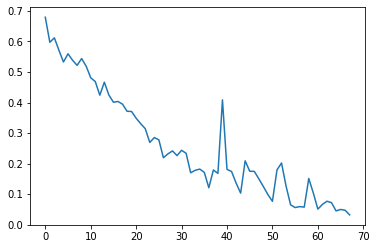

In [61]:
acc = []
acc_val = []
auc = []
auc_val = []
precision = []
precision_val = []
recall = []
recall_val = []
f1 = []
f1_val = []
val_accuracy = 0.0
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    rcnn_binary_latefusion_model = RCNN(body_features, face_features, n_length, n_outputs, fusion=True)
    history = rcnn_binary_latefusion_model.trainFusioned(body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs=epochs, batch_size=32)
    plt.plot(history.history['loss'])
    plt.show()
    acc.append(history.history['accuracy'][-1])
    acc_val.append(history.history['val_accuracy'][-1])
    f1.append(history.history['f1_score'][-1])
    f1_val.append(history.history['val_f1_score'][-1])
    save_model = False
    for key in history.history.keys():
        if 'auc' in key and not 'val' in key:
            auc.append(history.history[key][-1])
        elif 'auc' in key and 'val' in key:
            auc_val.append(history.history[key][-1])
            if history.history[key][-1] > val_accuracy:
                val_accuracy = history.history[key][-1]
                save_model = True
        if 'precision' in key and not 'val' in key:
            precision.append(history.history[key][-1])
        elif 'precision' in key and 'val' in key:
            precision_val.append(history.history[key][-1])
        if 'recall' in key and not 'val' in key:
            recall.append(history.history[key][-1])
        elif 'recall' in key and 'val' in key:
            recall_val.append(history.history[key][-1])
    if save_model:
        rcnn_binary_latefusion_model.save(model_path / 'late_binary_rcnn.h5')

#### Training performance

In [62]:
late_rcnn_train_results = {'Accuracy': np.average(acc), 'ROC/AUC': np.average(auc), 'Precision': np.average(precision), 'Recall': np.average(recall), 'F1-score': np.average(f1)}
late_rcnn_train_results

{'Accuracy': 0.9864075779914856,
 'ROC/AUC': 0.9986392676830291,
 'Precision': 0.9889843940734864,
 'Recall': 0.9829249918460846,
 'F1-score': 0.6548503339290619}

#### Validation performance

In [63]:
late_rcnn_val_results = {'Accuracy': np.average(acc_val), 'ROC/AUC': np.average(auc_val), 'Precision': np.average(precision_val), 'Recall': np.average(recall_val), 'F1-score': np.average(f1_val)}
late_rcnn_val_results

{'Accuracy': 0.683543860912323,
 'ROC/AUC': 0.7386991202831268,
 'Precision': 0.6665671288967132,
 'Recall': 0.705272090435028,
 'F1-score': 0.6530827581882477}

#### Predictions and performance on test set

In [64]:
rcnn_binary_latefusion_model = load_model(model_path / 'late_binary_rcnn.h5')
y_pred = rcnn_binary_latefusion_model.predict([body_X_test, face_X_test])
_, acc, auc, precision, recall, f1 = rcnn_binary_latefusion_model.evaluate([body_X_test, face_X_test], y_test)
rnn_auc.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

9/9 [==============================] - 0s 8ms/step - loss: 1.5754 - accuracy: 0.6082 - auc_76: 0.6541 - precision_76: 0.9091 - recall_76: 0.6061 - f1_score: 0.9259
Accuracy: 60.82% 
ROC/AUC: 0.65 
Precision: 0.91 
Recall: 0.61 
F1 score: 0.93


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

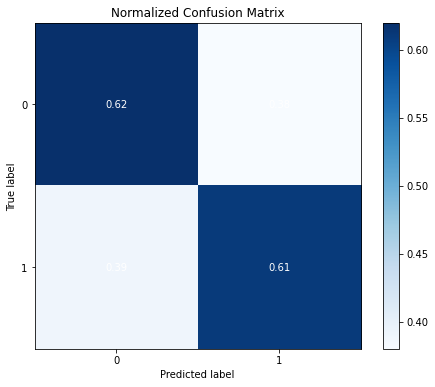

In [65]:
y_pred = np.where(y_pred > 0.5, 1, 0)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, figsize=(8,6))

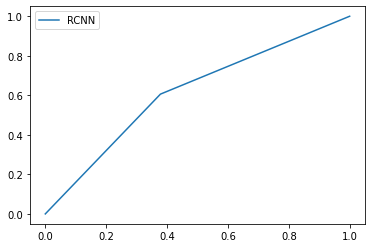

In [66]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='RCNN')
plt.legend()
plt.show()

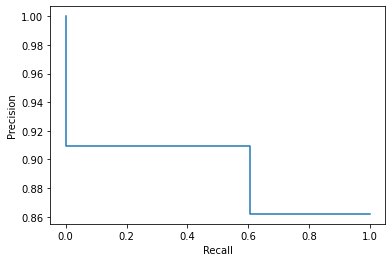

In [67]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 4.3 Ensemble

In [68]:
cnnlstm_body_member = KerasMember(name="CNN + Bidirectional LSTM Body Model", keras_model=cnnlstm_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
rcnn_body_member = KerasMember(name="RCNN Body Model", keras_model=rcnn_binary_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
cnnlstm_face_member = KerasMember(name="CNN + Bidirectional LSTM Face Model", keras_model=cnnlstm_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))
rcnn_face_member = KerasMember(name="RCNN Face Model", keras_model=rcnn_binary_face_model, train_batches=(face_X_train, y_train), val_batches=(face_X_test, face_y_test))

In [72]:
dirichletEnsemble = DirichletEnsemble()
dirichletEnsemble.add_member(cnnlstm_body_member)
dirichletEnsemble.add_member(rcnn_body_member)
dirichletEnsemble.add_member(cnnlstm_face_member)
dirichletEnsemble.add_member(rcnn_face_member)
dirichletEnsemble.fit()

NameError: name 'accuracy_score' is not defined

In [ ]:
e = dirichletEnsemble.describe()
cnn_auc.append(round(e, 2))
rnn_auc.append(0)

## Results

In [ ]:
labels = ['Unimodal (Body)', 'Unimodal (Face)', 'Early Fusion', 'Late Fusion', 'Ensemble']

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(14, 10))
rects1 = ax.bar(x - width/2, cnn_auc, width, label='CNN + BiLSTM')
rects2 = ax.bar(x + width/2, rnn_auc, width, label='RCNN')

ax.set_title('Baseline AUC (Binary Classification)')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()